In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
search_terms = {
    'EEG': 'eeg|erp|erd',
    'fMRI': 'fmri|mri',
    'eye-tracking': 'eye-tracking', 
    'fNIRS': 'fnirs'
}

math_terms = ['Algebra', 'Geometry', 'Arithmetic', 'Numeracy', 'Statistics', 'Calculus', 'Probability',
                 'Trigonometry', 'AMT', 'problem-solving', 'problem-posing']

psycho_terms = ['math-anxiety', 'math-giftedness', 'dyscalculia', 'Math-abilities', 
                'Math-skills', 'Math-difficulties']

In [62]:
# Load the data from the Excel file
num_rows_to_read = 601

covidence = pd.read_excel('Data base_for survey analysis - Roza.xlsx', sheet_name='MIX', nrows=num_rows_to_read)
print(covidence.columns)

Index(['Article_id', 'Authors', 'Author full names', 'Author(s) ID', 'Title',
       'Author Keywords', 'Age group', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Index Keywords', 'Molecular Sequence Numbers', 'Chemicals/CAS',
       'Tradenames', 'Manufacturers', 'Funding Details', 'Funding Texts',
       'References', 'Correspondence Address', 'Editors', 'Publisher',
       'Sponsors', 'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')


In [63]:
print(covidence[covidence['Year'].isna()])

     Article_id Authors Author full names Author(s) ID Title  \
141         142     NaN               NaN          NaN   NaN   

                                       Author Keywords  Age group  Year  \
141  eye-tracking; Geometry; shape-recognition; poi...        NaN   NaN   

    Source title  Volume  ... ISBN CODEN PubMed ID  \
141          NaN     NaN  ...  NaN   NaN       NaN   

    Language of Original Document  Abbreviated Source Title  Document Type  \
141                           NaN                       NaN            NaN   

    Publication Stage Open Access Source  EID  
141               NaN         NaN    NaN  NaN  

[1 rows x 48 columns]


In [64]:
# Convert 'Author keywords' column to lowercase and replace 'mri' with 'fmri' for uniformity 
covidence['Author Keywords'] = covidence['Author Keywords'].str.lower()

for term, forms in search_terms.items():
    covidence['Author Keywords'] = covidence['Author Keywords'].str.replace(forms, term.lower(), regex=True)

# 1. Number of Papers Published per Year

Year
2019    50
2021    45
2020    44
2018    40
2014    40
2023    38
2022    37
2015    37
2013    31
2016    30
2012    28
2010    26
2017    25
2011    23
2009    23
2007    12
2024    11
2006    10
2008     9
2004     9
2005     8
2003     4
1999     3
2001     3
1990     2
2002     2
2000     2
1995     2
1980     1
1991     1
1987     1
1992     1
1996     1
Name: count, dtype: int64


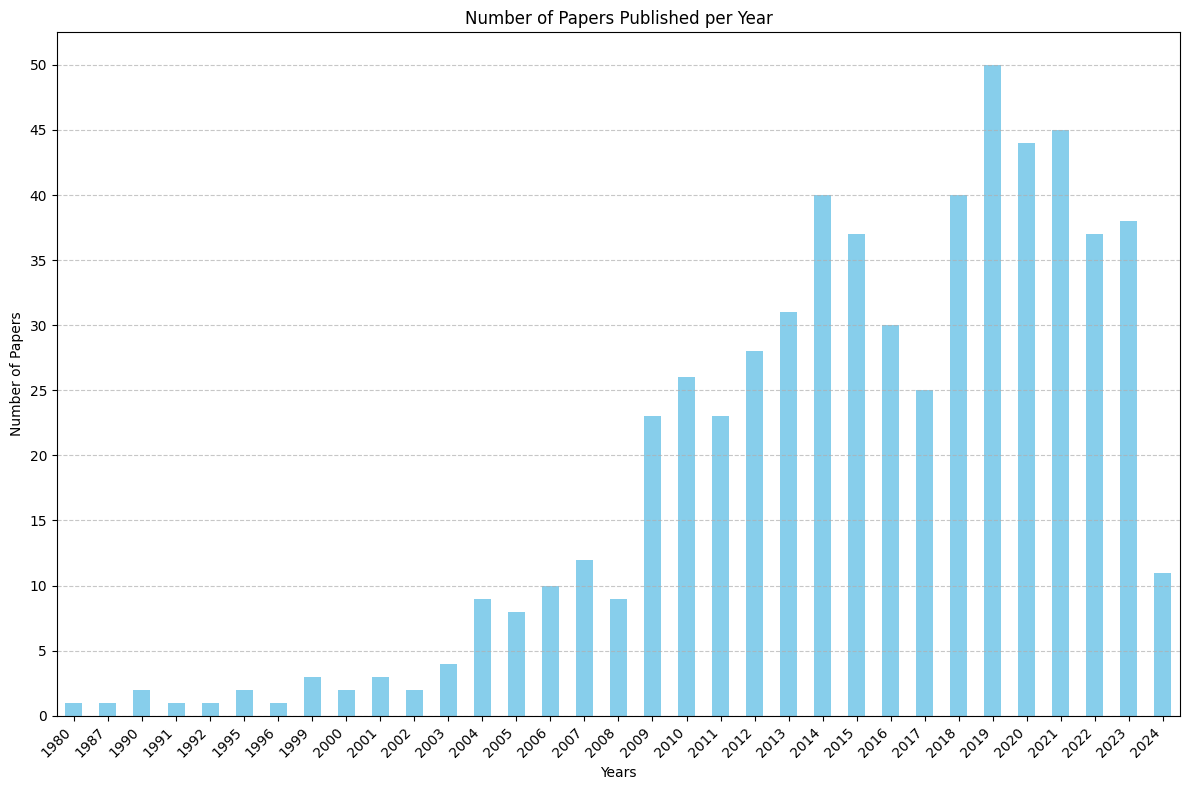

In [65]:
# Ensure 'Year' column is converted to numeric, forcing non-numeric values to NaN and then dropping them
covidence['Year'] = pd.to_numeric(covidence['Year'], errors='coerce')
covidence = covidence.dropna(subset=['Year'])

# Convert 'Year' column to integer type
covidence['Year'] = covidence['Year'].astype(int).dropna()

# Calculate the number of articles published per year
articles_per_year = covidence['Year'].value_counts()

print(articles_per_year)

# Sort the series by index (year)
articles_per_year_sorted = articles_per_year.sort_index()

# Plot the data
plt.figure(figsize=(12, 8))
ax = articles_per_year_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Papers Published per Year')
plt.xlabel('Years')
plt.ylabel('Number of Papers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Set x-axis to jump in increments of 1
ax.yaxis.set_major_locator(plt.MultipleLocator(5))

plt.show()


# 2. Number of Papers for major tools

EEG: 176
fMRI: 256
eye-tracking: 138
fNIRS: 32


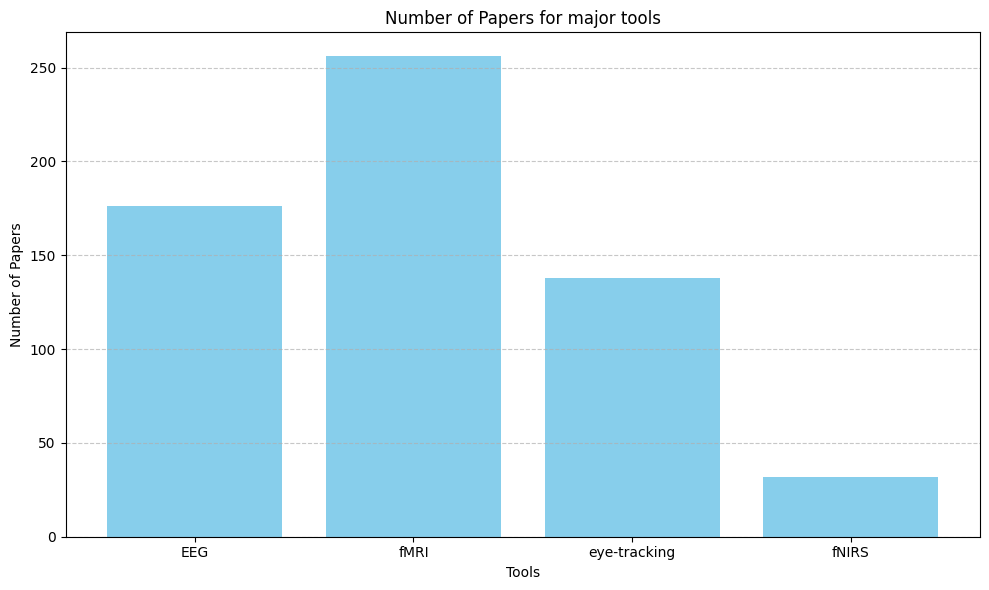

In [66]:
# Convert the 'Author keywords' column to lowercase and fill NaN values with an empty string
s = covidence['Author Keywords']

# Initialize a dictionary to store counts for each search term
term_counts = {term: 0 for term in search_terms}

# Loop through each term and count its occurrences in the 'Author keywords' column
for term, forms in search_terms.items():
    count = s.str.contains(forms).sum()
    print(f"{term}: {count}")
    term_counts[term] = count
    
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(term_counts.keys(), term_counts.values(), color='skyblue')
plt.title('Number of Papers for major tools')
plt.xlabel('Tools')
plt.ylabel('Number of Papers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Number of Papers for each major tools by years

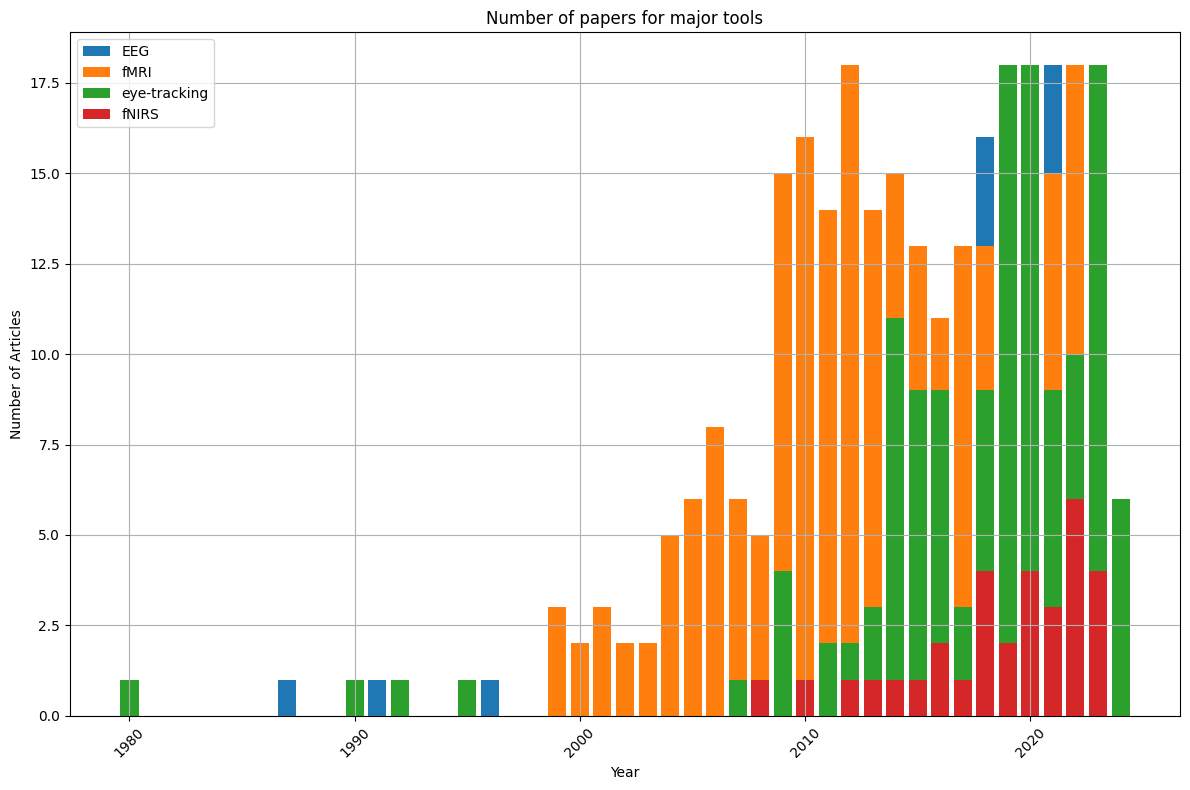


Number of Articles per Search Term and Year:
       EEG  fMRI  eye-tracking  fNIRS
1980    0     0             1      0
1987    1     0             0      0
1990    1     1             1      0
1991    1     0             0      0
1992    0     0             1      0
1995    1     0             1      0
1996    1     0             0      0
1999    1     3             0      0
2000    0     2             0      0
2001    1     3             0      0
2002    0     2             0      0
2003    2     2             0      0
2004    4     5             0      0
2005    2     6             0      0
2006    1     8             0      0
2007    6     6             1      0
2008    2     5             1      1
2009    5    15             4      0
2010    8    16             1      1
2011    7    14             2      0
2012    6    18             2      1
2013   12    14             3      1
2014   12    15            11      1
2015   13    13             9      1
2016    7    11             

In [67]:
# Initialize an empty dictionary to store counts for each term per year
term_counts_per_year = {
    term: covidence[covidence['Author Keywords'].str.contains(search_terms[term])]['Year'].value_counts().sort_index() 
    for term in search_terms.keys()
}

# Ensure all years are included in the plots
years = sorted(set().union(*[counts.index for counts in term_counts_per_year.values()]))

# Plot the data
plt.figure(figsize=(12, 8))
for term, counts in term_counts_per_year.items():
    counts = counts.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
    plt.bar(counts.index, counts.values, label=term)

plt.title('Number of papers for major tools')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display number of articles per search term and year in a table
article_counts = pd.DataFrame(index=years)

for term in search_terms:
    term_counts_per_year = covidence[covidence['Author Keywords'].str.contains(term.lower())]['Year'].value_counts().sort_index()
    term_counts_per_year = term_counts_per_year.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
    article_counts[term] = term_counts_per_year

print("\nNumber of Articles per Search Term and Year:\n", article_counts)

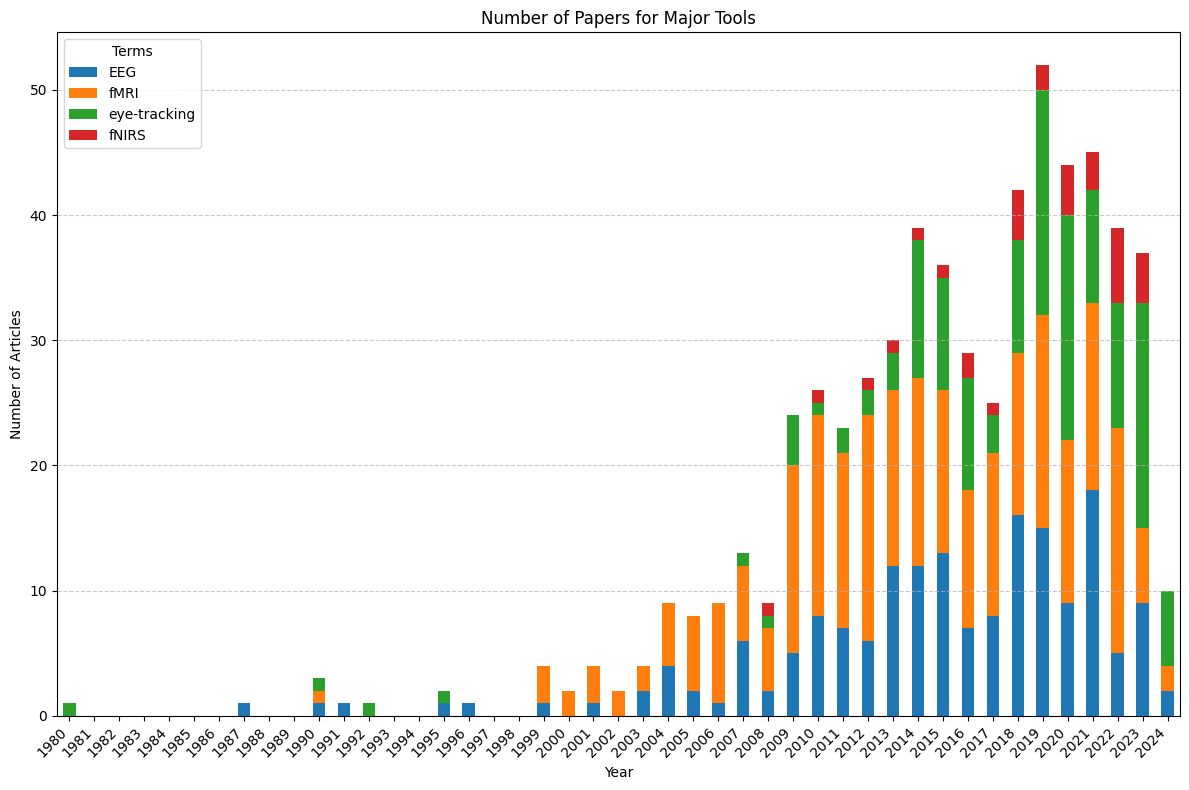


Number of Articles per Search Term and Year:
       EEG  fMRI  eye-tracking  fNIRS
1980    0     0             1      0
1981    0     0             0      0
1982    0     0             0      0
1983    0     0             0      0
1984    0     0             0      0
1985    0     0             0      0
1986    0     0             0      0
1987    1     0             0      0
1988    0     0             0      0
1989    0     0             0      0
1990    1     1             1      0
1991    1     0             0      0
1992    0     0             1      0
1993    0     0             0      0
1994    0     0             0      0
1995    1     0             1      0
1996    1     0             0      0
1997    0     0             0      0
1998    0     0             0      0
1999    1     3             0      0
2000    0     2             0      0
2001    1     3             0      0
2002    0     2             0      0
2003    2     2             0      0
2004    4     5             

In [83]:
# Initialize an empty dictionary to store counts for each term per year
term_counts_per_year = {
    term: covidence[covidence['Author Keywords'].str.contains(search_terms[term])]['Year'].value_counts().sort_index() 
    for term in search_terms.keys()
}

# Determine the complete range of years
all_years = range(covidence['Year'].min(), covidence['Year'].max() + 1)

# Create a DataFrame to hold all counts for each term and year
article_counts = pd.DataFrame(index=all_years)

for term in search_terms:
    term_counts_per_year = covidence[covidence['Author Keywords'].str.contains(term.lower())]['Year'].value_counts().sort_index()
    term_counts_per_year = term_counts_per_year.reindex(all_years, fill_value=0)  # Ensure counts for all years, fill missing with 0
    article_counts[term] = term_counts_per_year

# Plot the data
article_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number of Papers for Major Tools')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(title='Terms')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nNumber of Articles per Search Term and Year:\n", article_counts)



# 4. Distribution of publications from 1980 to 2024 for each methodology

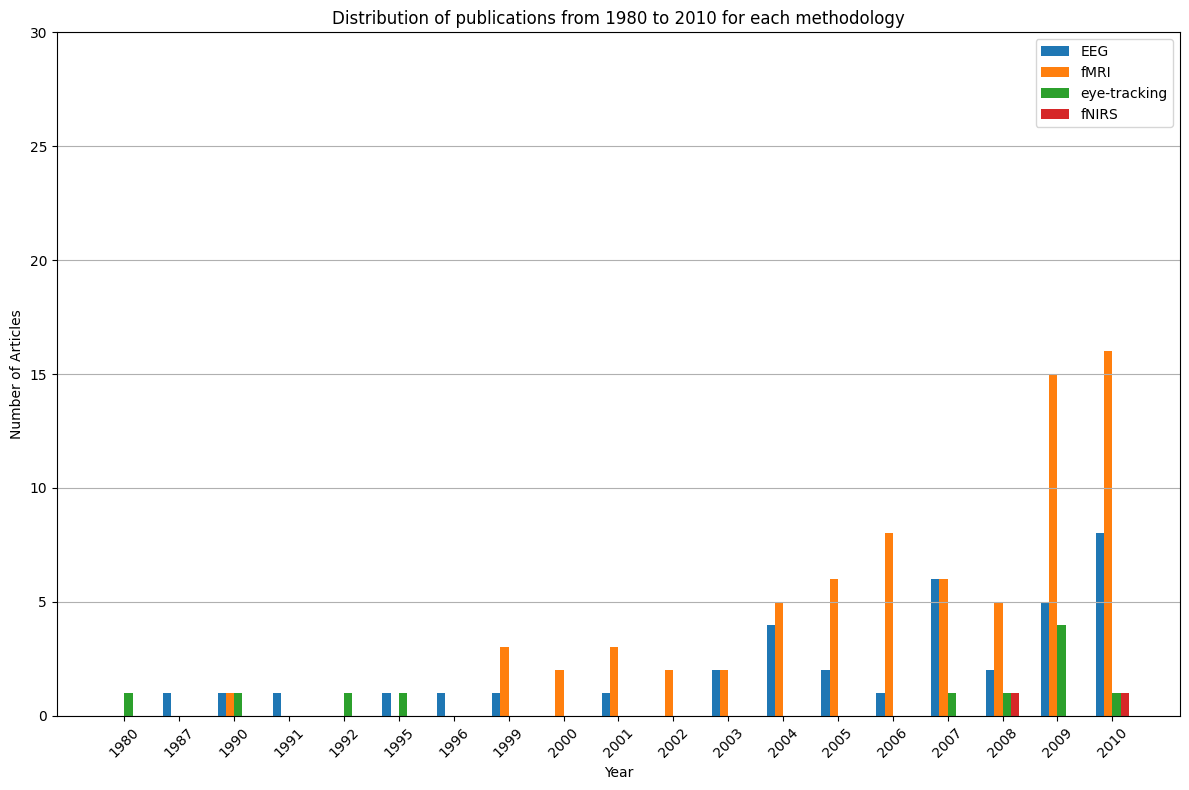


Number of Articles per Search Term and Year:
       EEG  fMRI  eye-tracking  fNIRS
1980    0     0             1      0
1987    1     0             0      0
1990    1     1             1      0
1991    1     0             0      0
1992    0     0             1      0
1995    1     0             1      0
1996    1     0             0      0
1999    1     3             0      0
2000    0     2             0      0
2001    1     3             0      0
2002    0     2             0      0
2003    2     2             0      0
2004    4     5             0      0
2005    2     6             0      0
2006    1     8             0      0
2007    6     6             1      0
2008    2     5             1      1
2009    5    15             4      0
2010    8    16             1      1


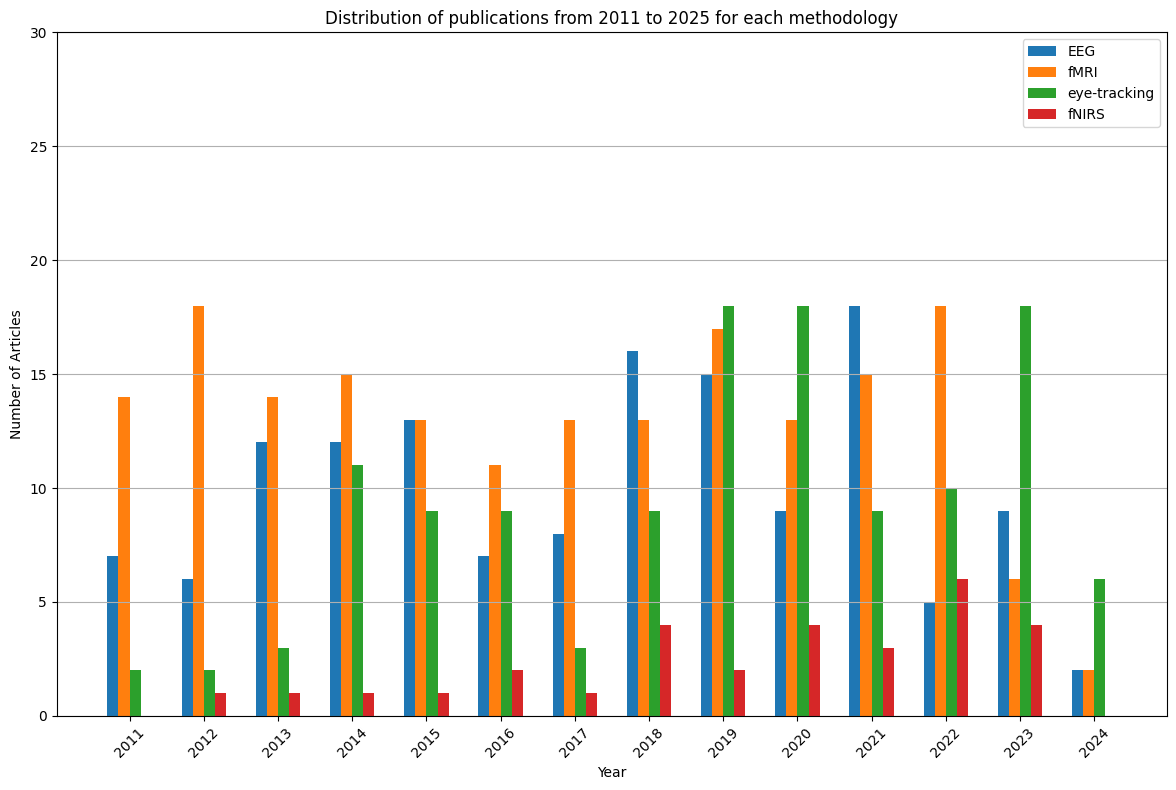


Number of Articles per Search Term and Year:
       EEG  fMRI  eye-tracking  fNIRS
2011    7    14             2      0
2012    6    18             2      1
2013   12    14             3      1
2014   12    15            11      1
2015   13    13             9      1
2016    7    11             9      2
2017    8    13             3      1
2018   16    13             9      4
2019   15    17            18      2
2020    9    13            18      4
2021   18    15             9      3
2022    5    18            10      6
2023    9     6            18      4
2024    2     2             6      0


In [68]:

# Convert 'Author keywords' column to lowercase and replace 'mri' with 'fmri' for uniformity
covidence['Author Keywords'] = covidence['Author Keywords'].str.lower().str.replace('mri', 'fmri')
covidence['Author Keywords'] = covidence['Author Keywords'].str.lower().str.replace('eeg|erp|erd', 'eeg', regex=True)

def predicate(term, range):
    year_start, year_end = range
    numeric_year = pd.to_numeric(covidence['Year'])
    contains_term = covidence['Author Keywords'].str.contains(term.lower())
    year_range = numeric_year.between(year_start, year_end)
    return contains_term & year_range

year_ranges = [
    (1980, 2010),
    (2011, 2025)
]

for year_range in year_ranges:
    # Initialize an empty dictionary to store counts for each term per year
    term_counts_per_year = {}
    for term in search_terms:
        relevant_rows = covidence[predicate(term, year_range)]
        published_year_column = relevant_rows['Year']
        term_counts_per_year[term] = published_year_column.value_counts().sort_index()
    
    # Ensure all years are included in the plots
    years = sorted(set().union(*[counts.index for counts in term_counts_per_year.values()]))
    
    # Plot the data
    plt.figure(figsize=(12, 8))
    width = 0.15  # Width of each bar
    
    # Positions of the bars on the x-axis
    positions = {term: [i + idx * width for i in range(len(years))] for idx, term in enumerate(search_terms)}
    
    for term, counts in term_counts_per_year.items():
        counts = counts.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
        plt.bar(positions[term], counts.values, width=width, label=term)
    
    # Adjust x-ticks to be in the center of grouped bars
    plt.xticks([i + width*(len(search_terms)-1)/2 for i in range(len(years))], years, rotation=45)
    
    plt.title(f'Distribution of publications from {year_range[0]} to {year_range[1]} for each methodology')
    plt.xlabel('Year')
    plt.ylabel('Number of Articles')
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.ylim(0, 30)
    plt.show()
    
    # Display number of articles per search term and year in a table
    article_counts = pd.DataFrame(index=years)
    
    for term in search_terms:
        term_counts_per_year = covidence[covidence['Author Keywords'].str.contains(term.lower())]['Year'].value_counts().sort_index()
        term_counts_per_year = term_counts_per_year.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
        article_counts[term] = term_counts_per_year
    
    print("\nNumber of Articles per Search Term and Year:\n", article_counts)


# 5.1 # of each psychological topics

Number of studies for different Psychological Topics
math-anxiety: 41
math-giftedness: 0
dyscalculia: 18
Math-abilities: 7
Math-skills: 12
Math-difficulties: 9


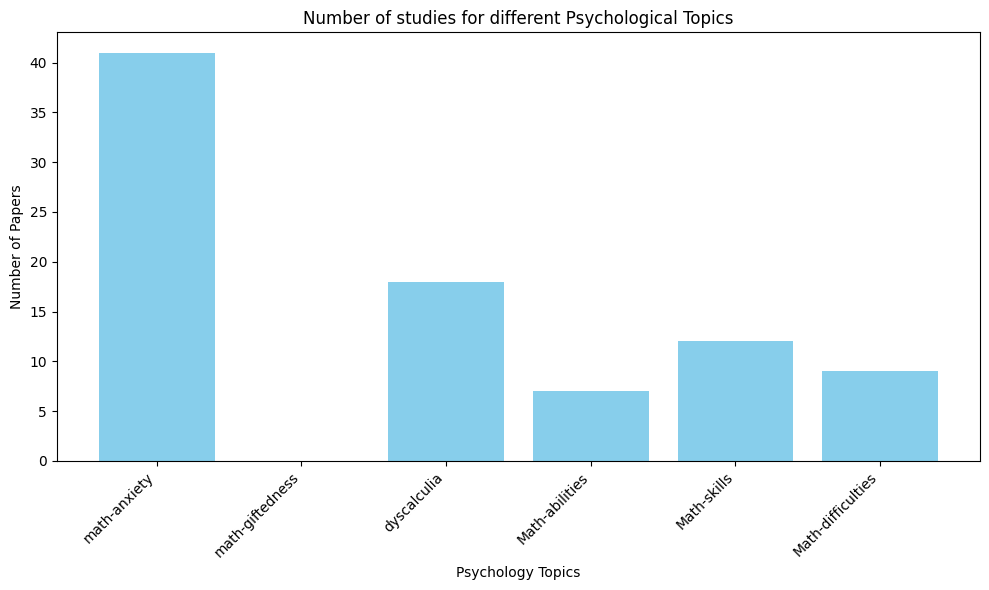

In [69]:
# Count occurrences of each search term in the 'Author keywords' column
term_counts = {}
for term in psycho_terms:
    term_counts[term] = covidence['Author Keywords'].str.contains(term.lower()).sum()

print("Number of studies for different Psychological Topics")
for term, count in term_counts.items():
    print(f"{term}: {count}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(term_counts.keys(), term_counts.values(), color='skyblue')
plt.title('Number of studies for different Psychological Topics')
plt.xlabel('Psychology Topics')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5.2 Frequency of psychological topics for each methodology

EEG {'math-anxiety': 21, 'math-giftedness': 0, 'dyscalculia': 3, 'Math-abilities': 2, 'Math-skills': 5, 'Math-difficulties': 2}


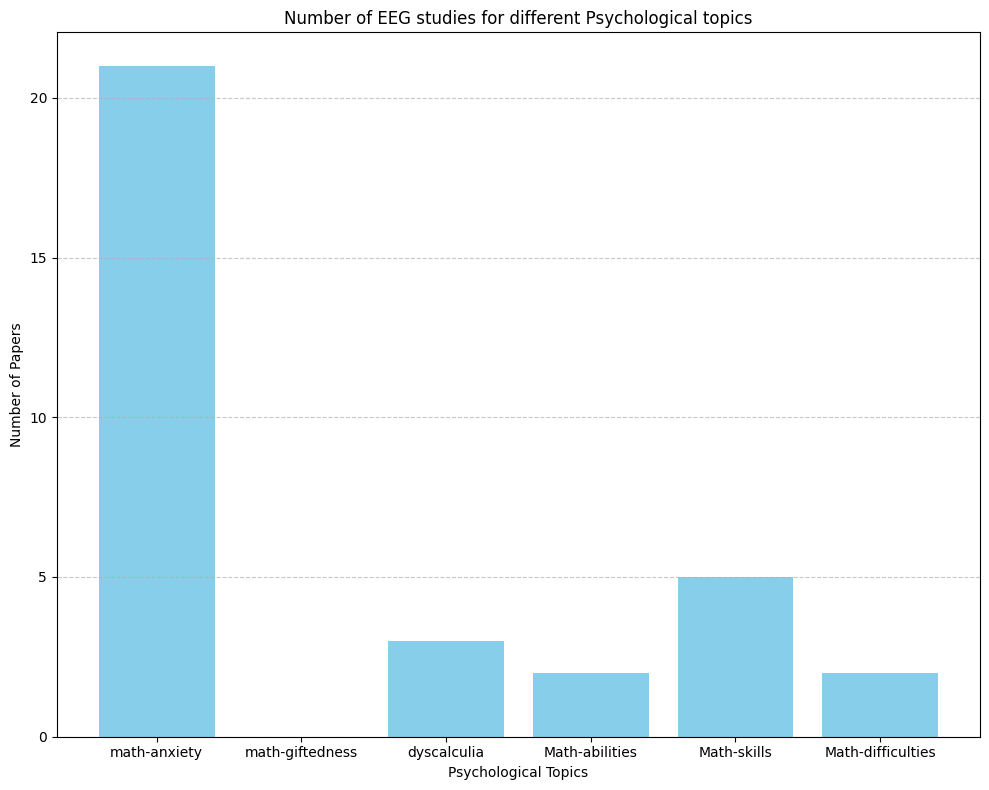

fMRI {'math-anxiety': 12, 'math-giftedness': 0, 'dyscalculia': 12, 'Math-abilities': 5, 'Math-skills': 3, 'Math-difficulties': 2}


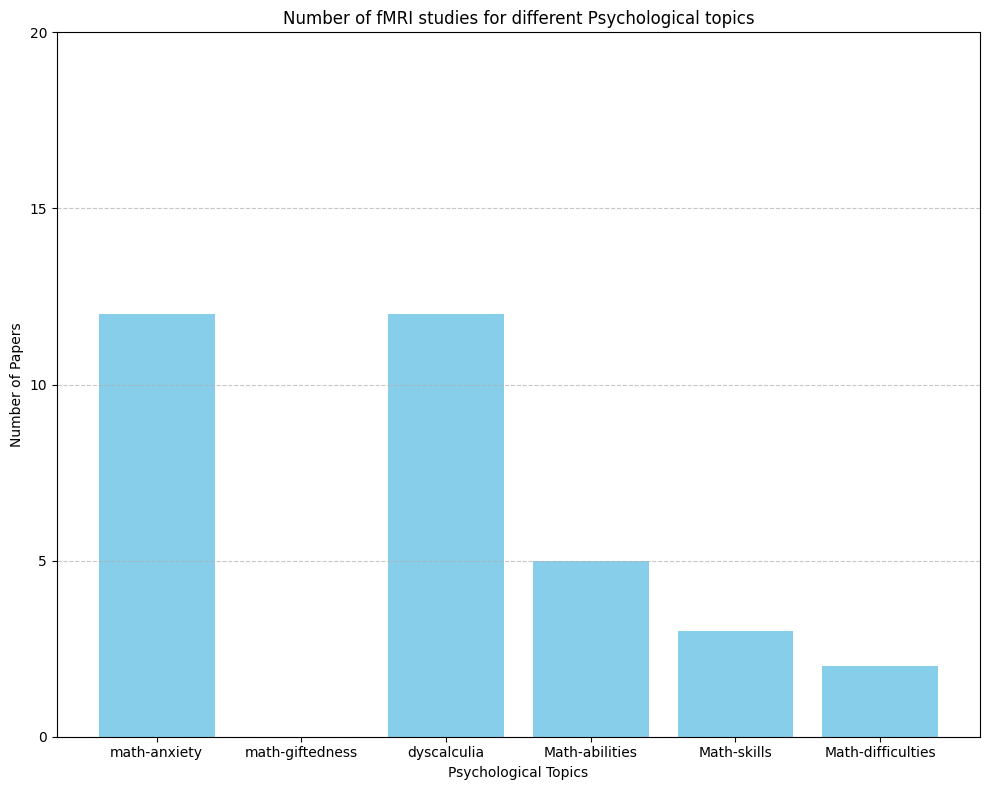

eye-tracking {'math-anxiety': 5, 'math-giftedness': 0, 'dyscalculia': 2, 'Math-abilities': 0, 'Math-skills': 4, 'Math-difficulties': 4}


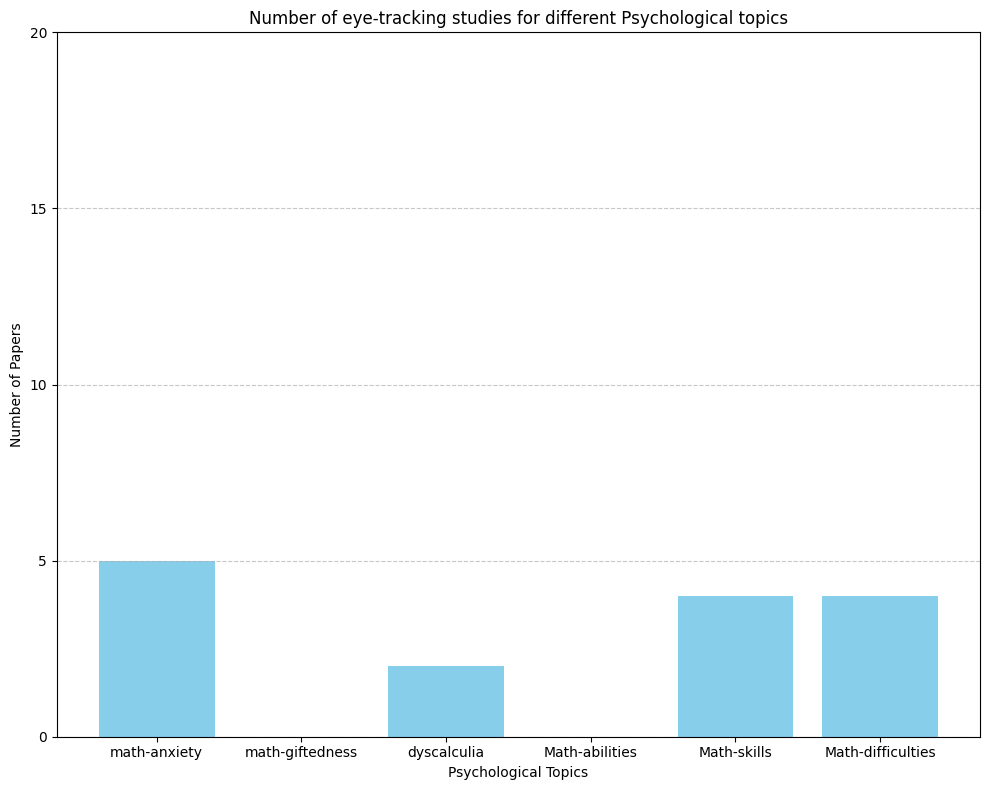

fNIRS {'math-anxiety': 1, 'math-giftedness': 0, 'dyscalculia': 0, 'Math-abilities': 0, 'Math-skills': 0, 'Math-difficulties': 1}


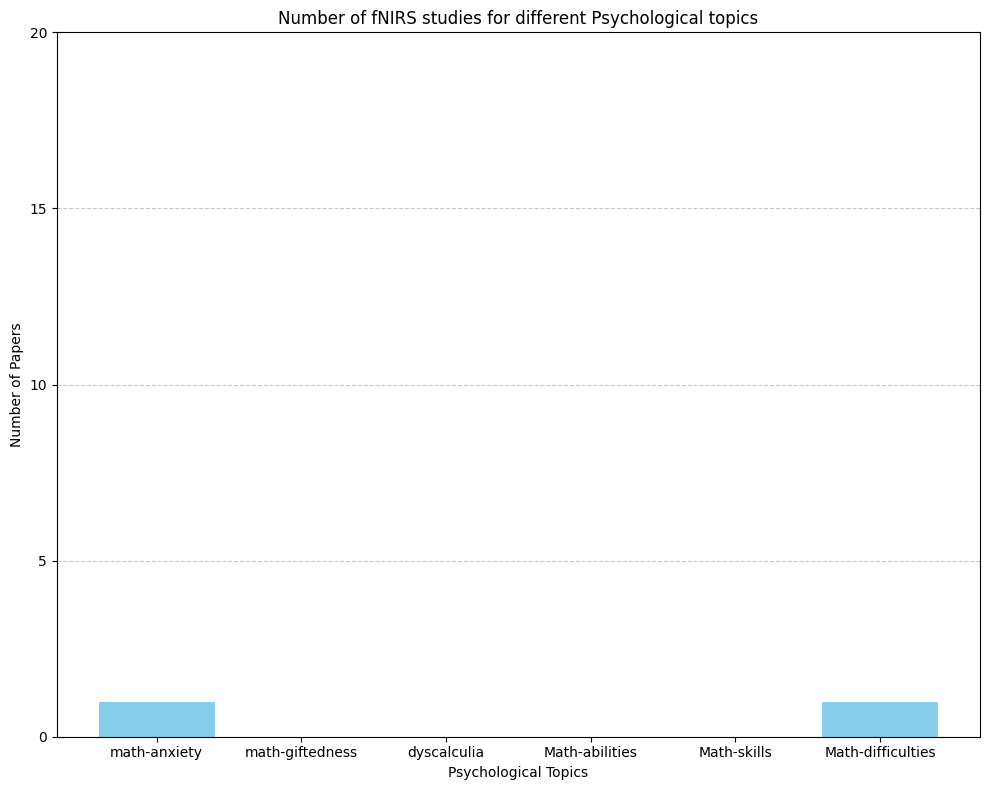

In [70]:
for search_term, forms in search_terms.items():
    relevant_rows = covidence[covidence['Author Keywords'].str.lower().str.contains(forms)]
        
    psycho_terms_counts = {}
    for psycho_term in psycho_terms:
        lower_keywords = relevant_rows['Author Keywords'].str.lower()
        contains_column = lower_keywords.str.contains(psycho_term.lower())  # column: True, True, False, False ...
        count_of_psycho_term = contains_column.sum()
        psycho_terms_counts[psycho_term] = count_of_psycho_term
    
    print(search_term, psycho_terms_counts)

    plt.figure(figsize=(10, 8))
    plt.bar(psycho_terms_counts.keys(), psycho_terms_counts.values(), color='skyblue')
    plt.title(f'Number of {search_term} studies for different Psychological topics')
    plt.xlabel('Psychological Topics')
    plt.ylabel('Number of Papers')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.yticks(np.arange(0, 25, 5))
    plt.tight_layout()
    plt.show()

# 6.1 # of each Mathematical topics

Number of studies for different Mathematical Topics
Algebra: 58
Geometry: 48
Arithmetic: 301
Numeracy: 44
Statistics: 7
Calculus: 6
Probability: 3
Trigonometry: 2
AMT: 10
problem-solving: 102
problem-posing: 2


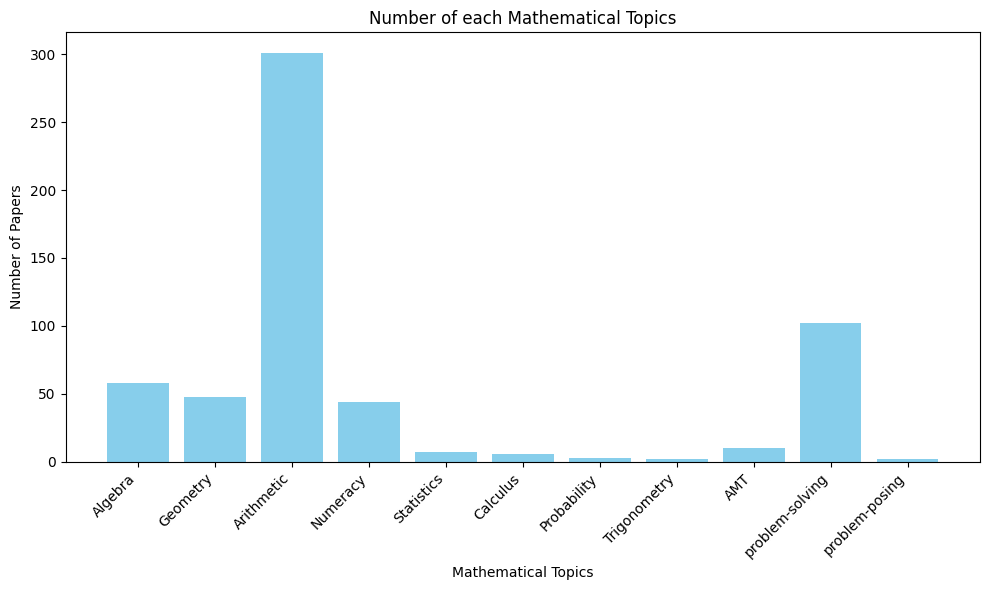

In [71]:
# Count occurrences of each search term in the 'Author keywords' column
term_counts = {}
for term in math_terms:
    term_counts[term] = covidence['Author Keywords'].str.contains(term.lower()).sum()

print("Number of studies for different Mathematical Topics")

for term, count in term_counts.items():
    print(f"{term}: {count}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(term_counts.keys(), term_counts.values(), color='skyblue')
plt.title('Number of each Mathematical Topics')
plt.xlabel('Mathematical Topics')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6.2 Frequency of Mathematicl topic for each methodology

EEG {'Algebra': 10, 'Geometry': 8, 'Arithmetic': 96, 'Numeracy': 16, 'Statistics': 1, 'Calculus': 0, 'Probability': 1, 'Trigonometry': 0, 'AMT': 2, 'problem-solving': 14, 'problem-posing': 0}


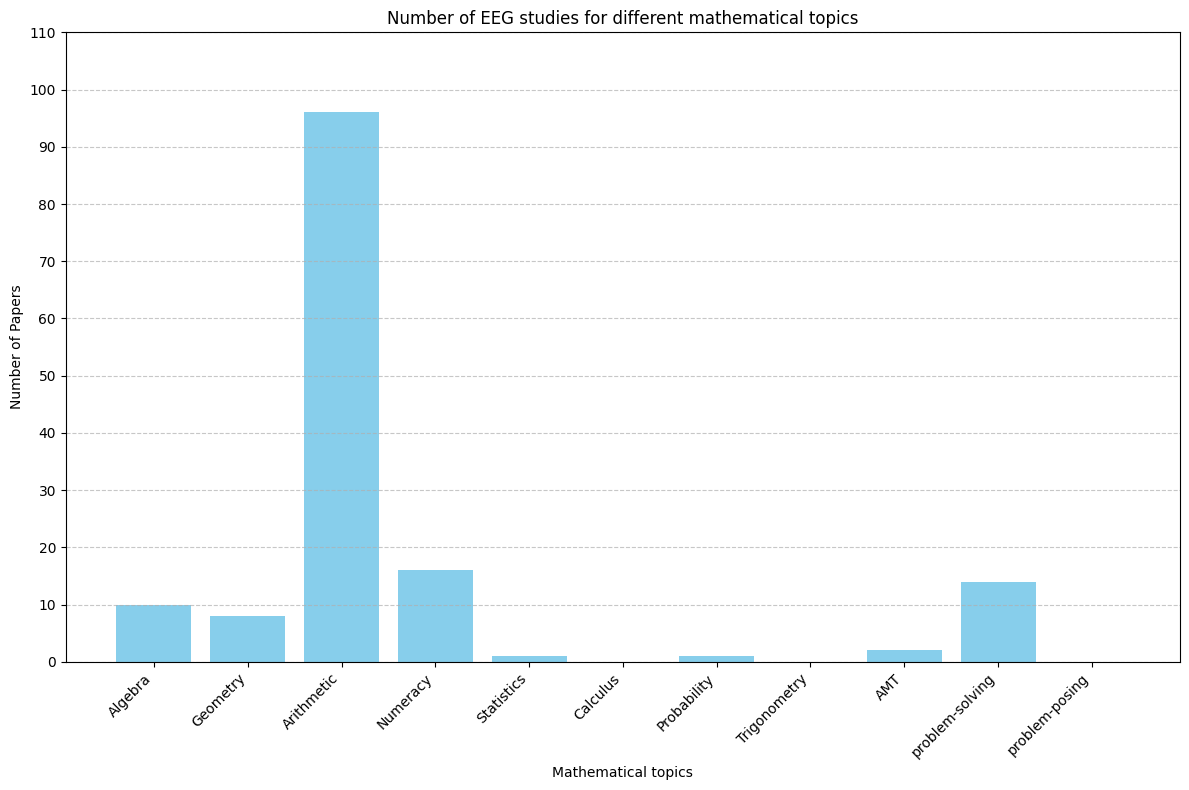

fMRI {'Algebra': 33, 'Geometry': 8, 'Arithmetic': 137, 'Numeracy': 20, 'Statistics': 0, 'Calculus': 2, 'Probability': 1, 'Trigonometry': 0, 'AMT': 1, 'problem-solving': 35, 'problem-posing': 0}


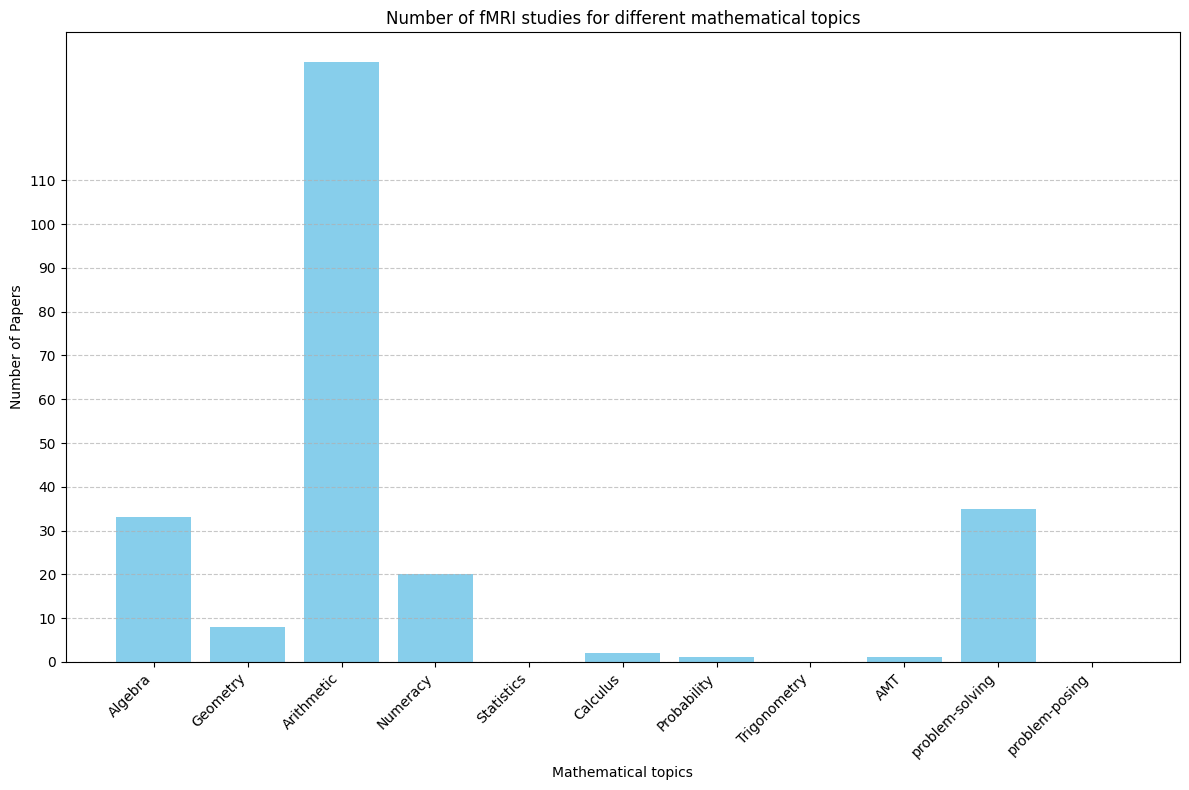

eye-tracking {'Algebra': 16, 'Geometry': 33, 'Arithmetic': 42, 'Numeracy': 7, 'Statistics': 5, 'Calculus': 4, 'Probability': 1, 'Trigonometry': 2, 'AMT': 6, 'problem-solving': 47, 'problem-posing': 2}


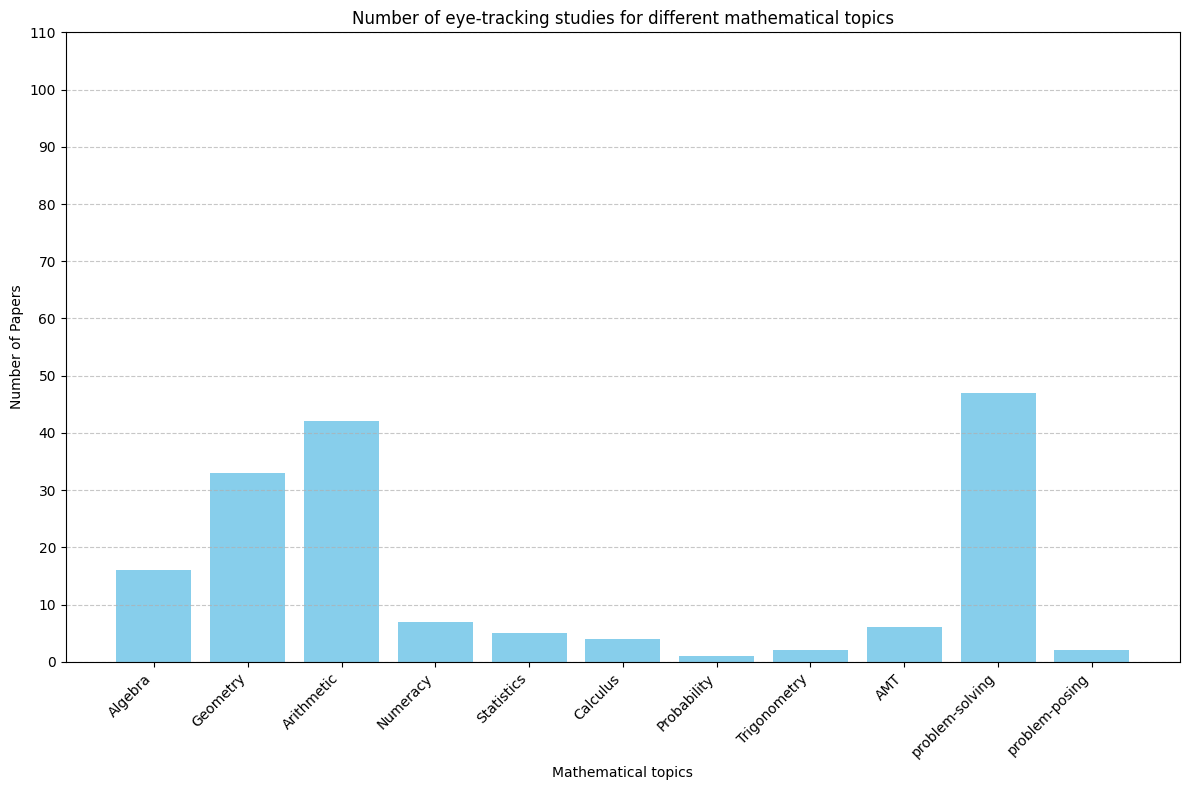

fNIRS {'Algebra': 0, 'Geometry': 3, 'Arithmetic': 22, 'Numeracy': 1, 'Statistics': 0, 'Calculus': 0, 'Probability': 0, 'Trigonometry': 0, 'AMT': 1, 'problem-solving': 6, 'problem-posing': 0}


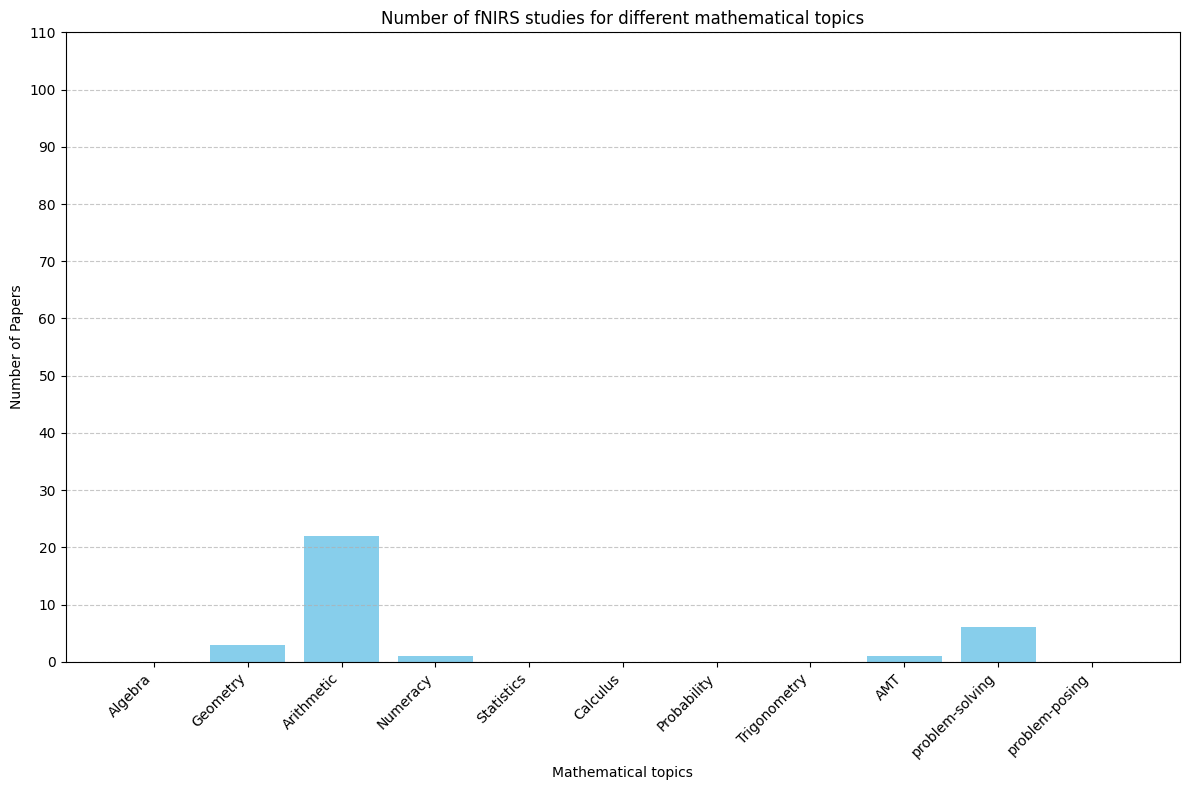

In [72]:
for search_term, forms in search_terms.items():
    relevant_rows = covidence[covidence['Author Keywords'].str.lower().str.contains(forms)]
        
    math_terms_counts = {}
    for math_term in math_terms:
        lower_keywords = relevant_rows['Author Keywords'].str.lower()
        contains_column = lower_keywords.str.contains(math_term.lower())  # column: True, True, False, False ...
        count_of_math_term = contains_column.sum()
        math_terms_counts[math_term] = count_of_math_term
    
    print(search_term, math_terms_counts)

    plt.figure(figsize=(12, 8))
    plt.bar(math_terms_counts.keys(), math_terms_counts.values(), color='skyblue')
    plt.title(f'Number of {search_term} studies for different mathematical topics')
    plt.xlabel('Mathematical topics')
    plt.ylabel('Number of Papers')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(np.arange(0, 120, 10))
    plt.tight_layout()
    plt.show()

# 7.1 Distribution of publications from 1980 to 2024 for Mathematical Topics

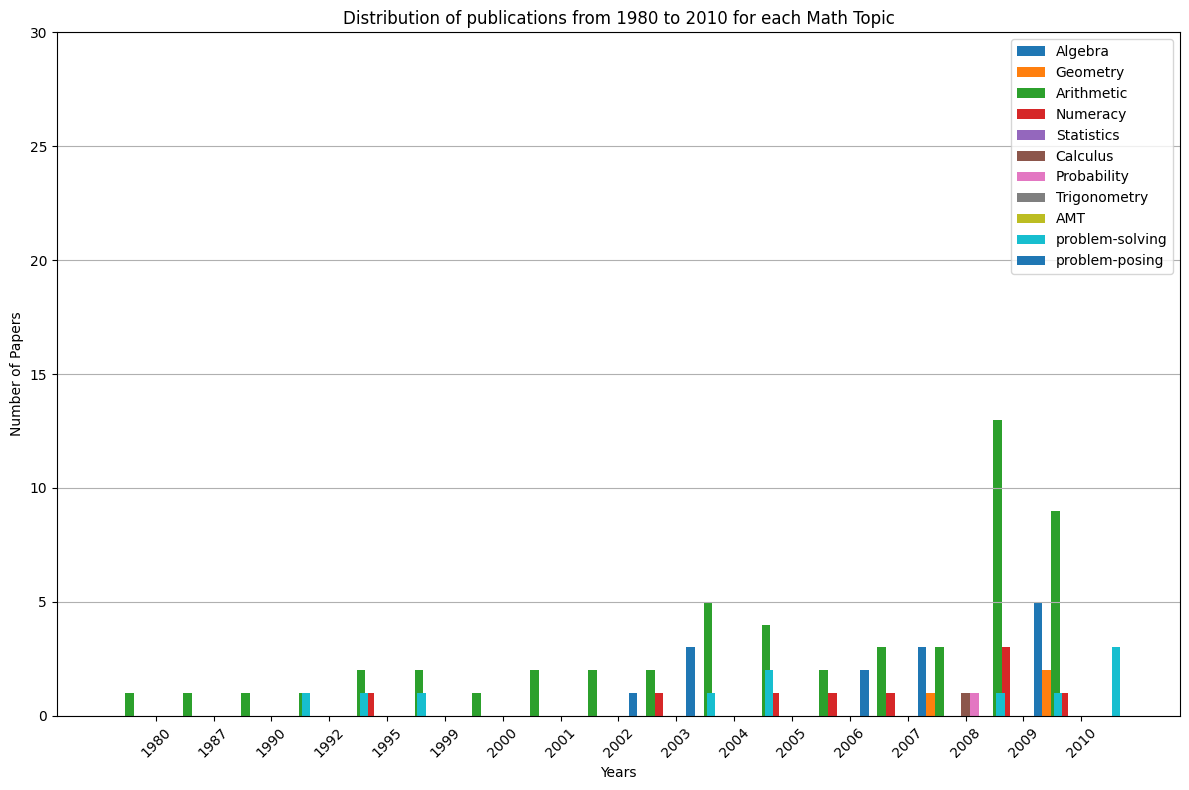


Number of Papers per Search Term and Year:
       Algebra  Geometry  Arithmetic  Numeracy  Statistics  Calculus  \
1980        0         0           1         0           0         0   
1987        0         0           1         0           0         0   
1990        0         0           1         0           0         0   
1992        0         0           1         0           0         0   
1995        0         0           2         1           0         0   
1999        0         0           2         0           0         0   
2000        0         0           1         0           0         0   
2001        0         0           2         0           0         0   
2002        0         0           2         0           0         0   
2003        1         0           2         1           0         0   
2004        3         0           5         0           0         0   
2005        0         0           4         1           0         0   
2006        0         0         

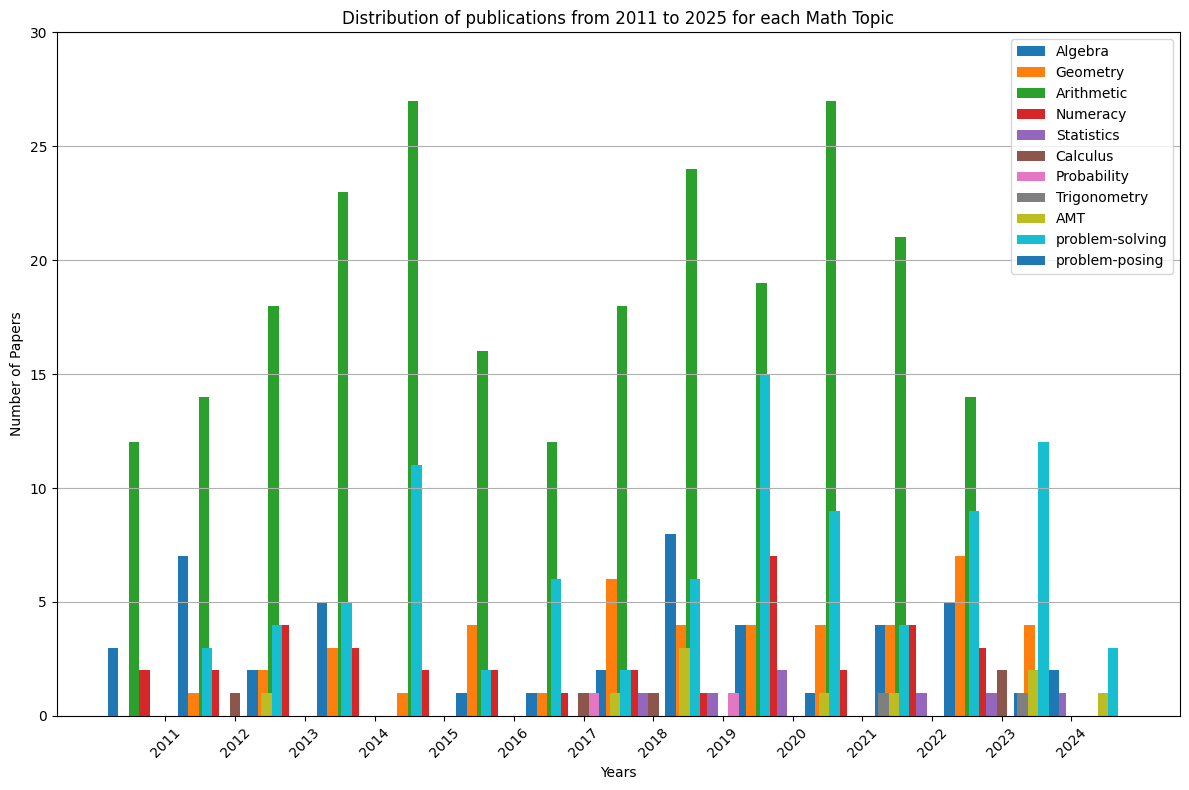


Number of Papers per Search Term and Year:
       Algebra  Geometry  Arithmetic  Numeracy  Statistics  Calculus  \
2011        3         0          12         2           0         0   
2012        7         1          14         2           0         1   
2013        2         2          18         4           0         0   
2014        5         3          23         3           0         0   
2015        0         1          27         2           0         0   
2016        1         4          16         2           0         0   
2017        1         1          12         1           0         1   
2018        2         6          18         2           1         1   
2019        8         4          24         1           1         0   
2020        4         4          19         7           2         0   
2021        1         4          27         2           0         0   
2022        4         4          21         4           1         0   
2023        5         7         

In [73]:

# Convert 'Author keywords' column to lowercase and replace 'mri' with 'fmri' for uniformity
covidence['Author Keywords'] = covidence['Author Keywords'].str.lower().str.replace('mri', 'fmri')
covidence['Author Keywords'] = covidence['Author Keywords'].str.lower().str.replace('eeg|erp|erd', 'eeg', regex=True)

def predicate(term, range):
    year_start, year_end = range
    numeric_year = pd.to_numeric(covidence['Year'])
    contains_term = covidence['Author Keywords'].str.contains(term.lower())
    year_range = numeric_year.between(year_start, year_end)
    return contains_term & year_range

year_ranges = [
    (1980, 2010),
    (2011, 2025)
]

for year_range in year_ranges:
    # Initialize an empty dictionary to store counts for each term per year
    term_counts_per_year = {}
    for term in math_terms:
        relevant_rows = covidence[predicate(term, year_range)]
        published_year_column = relevant_rows['Year']
        term_counts_per_year[term] = published_year_column.value_counts().sort_index()
    
    # Ensure all years are included in the plots
    years = sorted(set().union(*[counts.index for counts in term_counts_per_year.values()]))
    
    # Plot the data
    plt.figure(figsize=(12, 8))
    width = 0.15  # Width of each bar
    margin = 1
    # Positions of the bars on the x-axis
    positions = {term: [(i + idx * width) * margin for i in range(len(years))] for idx, term in enumerate(math_terms)}
    
    for term, counts in term_counts_per_year.items():
        counts = counts.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
        plt.bar(positions[term], counts.values, width=width, label=term)
    
    # Adjust x-ticks to be in the center of grouped bars
    plt.xticks([(i + width * (len(math_terms)-1)/2) * margin for i in range(len(years))], years, rotation=45)
    
    plt.title(f'Distribution of publications from {year_range[0]} to {year_range[1]} for each Math Topic')
    plt.xlabel('Years')
    plt.ylabel('Number of Papers')
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.ylim(0, 30)
    plt.show()
    
    # Display number of articles per search term and year in a table
    article_counts = pd.DataFrame(index=years)
    
    for term in math_terms:
        term_counts_per_year = covidence[covidence['Author Keywords'].str.contains(term.lower())]['Year'].value_counts().sort_index()
        term_counts_per_year = term_counts_per_year.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
        article_counts[term] = term_counts_per_year
    
    print("\nNumber of Papers per Search Term and Year:\n", article_counts)


# 7.2 Distribution of publications from 1980 to 2024 for each mathemical topic

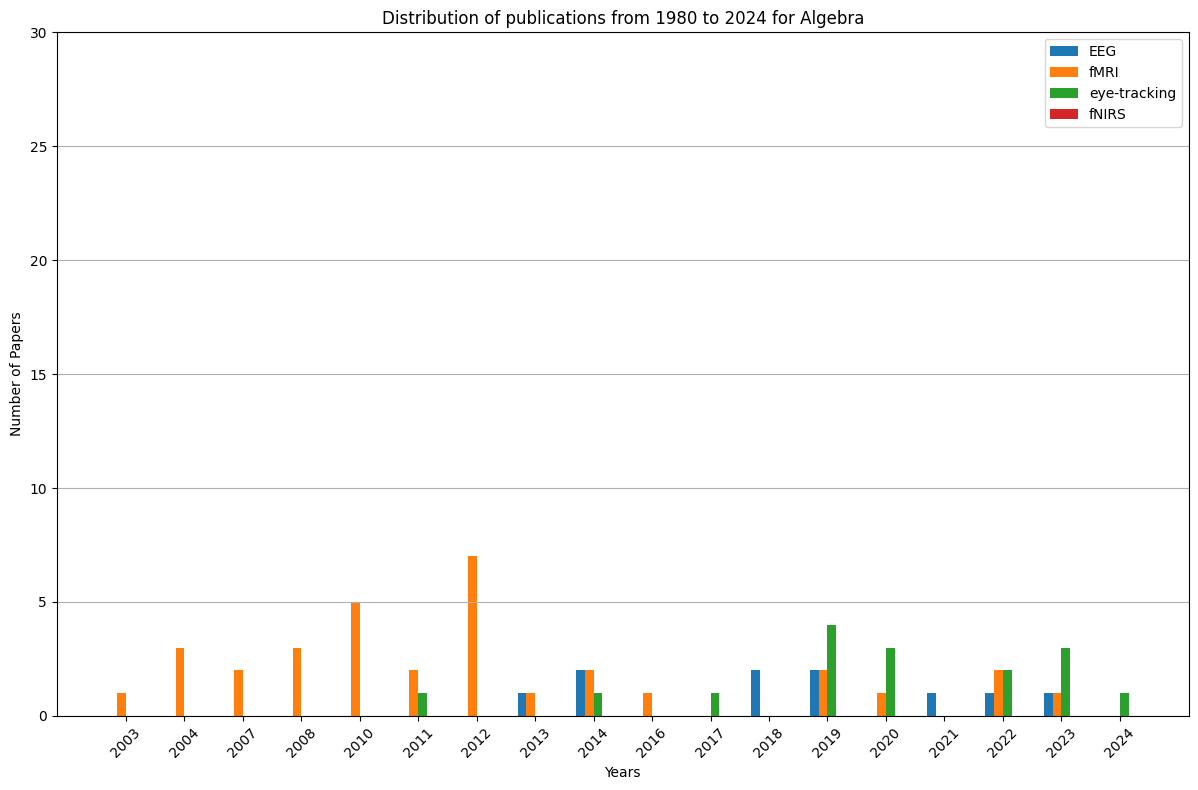


Number of Papers per Search Term and Year:
       math-anxiety  math-giftedness  dyscalculia  Math-abilities  Math-skills  \
2003             0                0            0               0            0   
2004             0                0            0               0            0   
2007             0                0            1               0            0   
2008             0                0            0               0            0   
2010             0                0            1               1            0   
2011             0                0            1               1            1   
2012             2                0            1               0            3   
2013             2                0            2               0            0   
2014             3                0            0               0            1   
2016             2                0            0               0            2   
2017             3                0            0               1

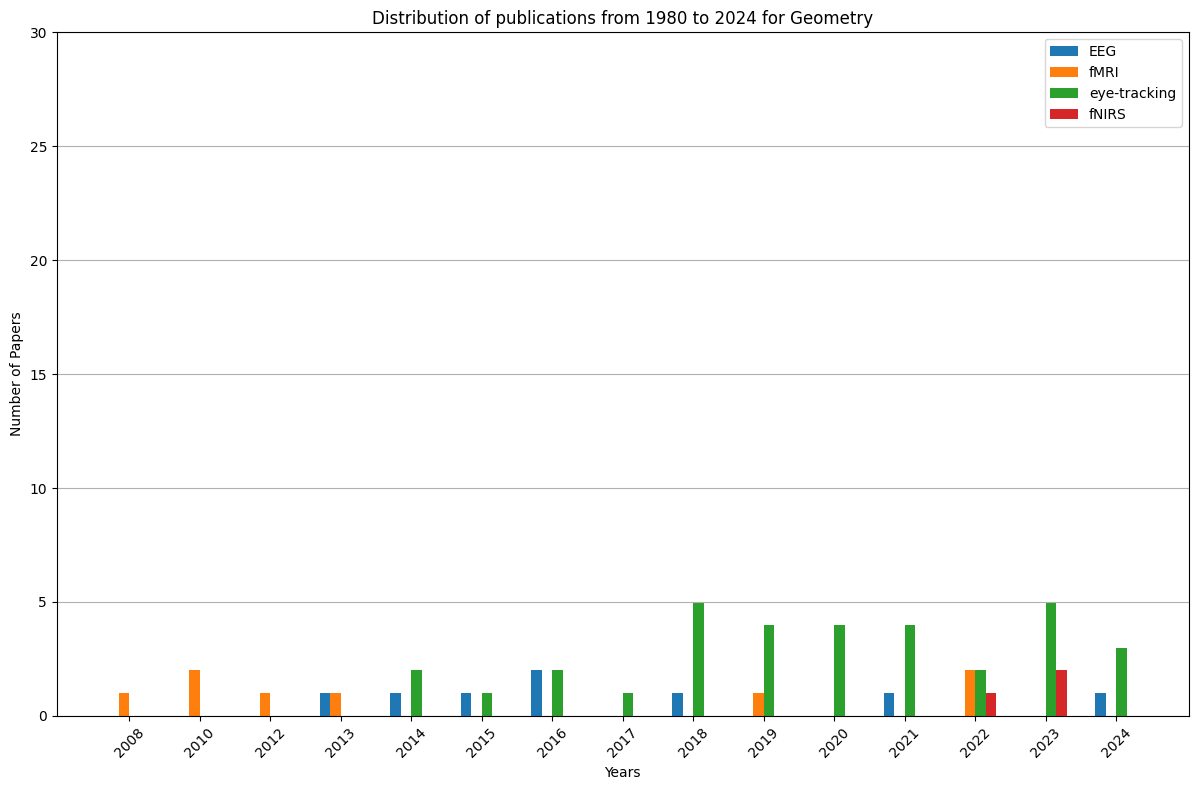


Number of Papers per Search Term and Year:
       math-anxiety  math-giftedness  dyscalculia  Math-abilities  Math-skills  \
2008             0                0            0               0            0   
2010             0                0            1               1            0   
2012             2                0            1               0            3   
2013             2                0            2               0            0   
2014             3                0            0               0            1   
2015             5                0            2               0            0   
2016             2                0            0               0            2   
2017             3                0            0               1            0   
2018             4                0            2               0            0   
2019             5                0            0               0            2   
2020             4                0            0               0

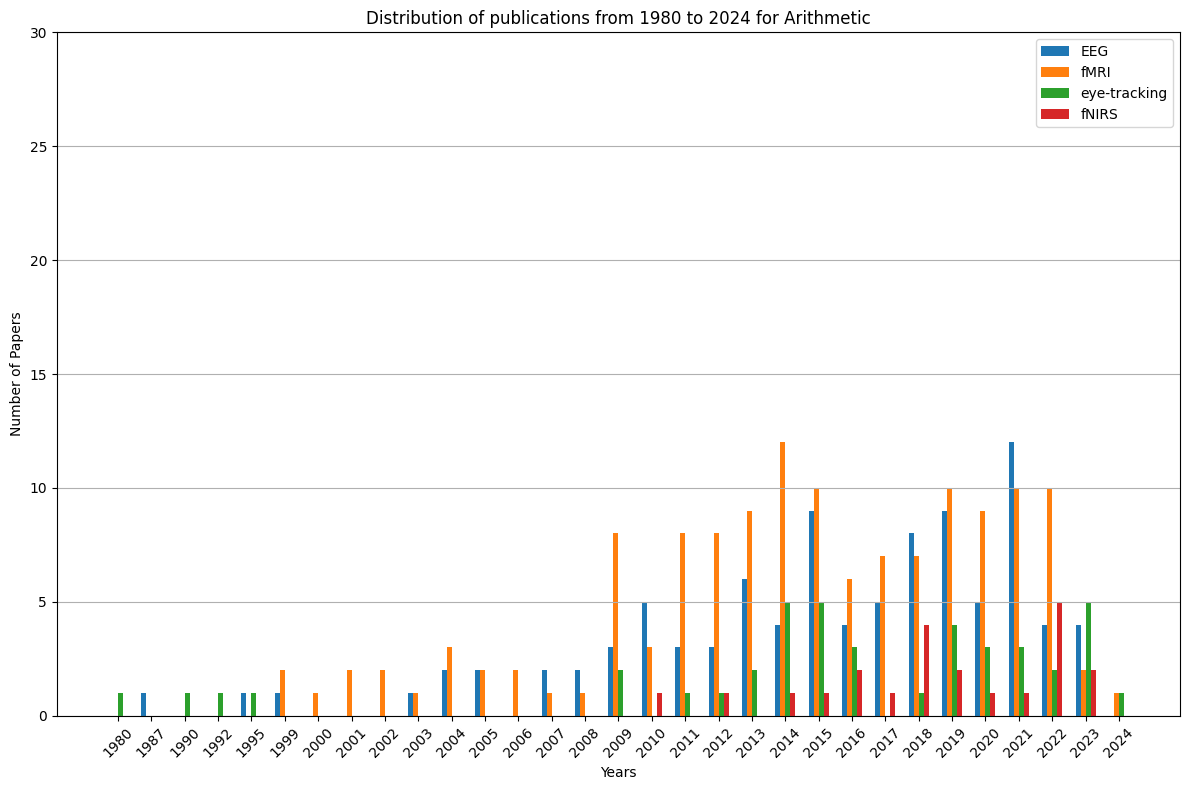


Number of Papers per Search Term and Year:
       math-anxiety  math-giftedness  dyscalculia  Math-abilities  Math-skills  \
1980             0                0            0               0            0   
1987             0                0            0               0            0   
1990             0                0            0               0            0   
1992             0                0            0               0            0   
1995             0                0            0               0            0   
1999             0                0            0               0            0   
2000             0                0            0               0            0   
2001             0                0            0               0            0   
2002             0                0            0               0            0   
2003             0                0            0               0            0   
2004             0                0            0               0

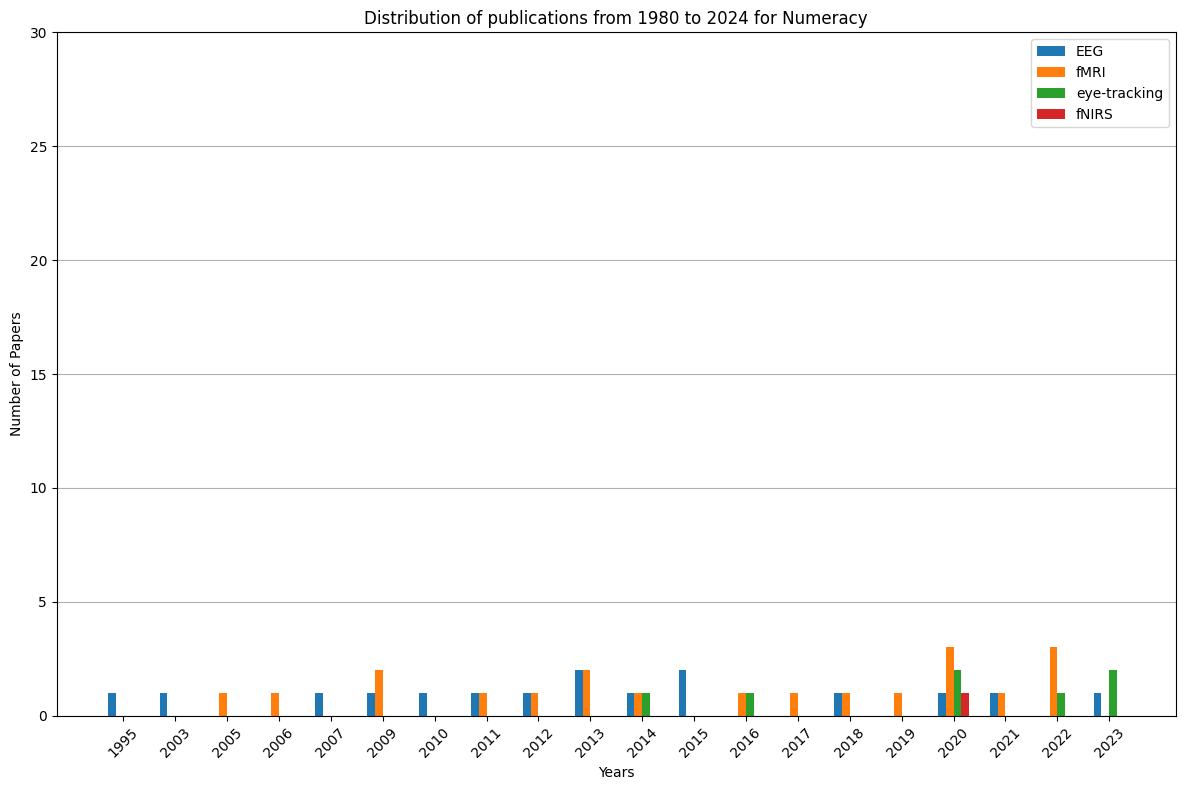


Number of Papers per Search Term and Year:
       math-anxiety  math-giftedness  dyscalculia  Math-abilities  Math-skills  \
1995             0                0            0               0            0   
2003             0                0            0               0            0   
2005             0                0            0               0            0   
2006             0                0            0               0            0   
2007             0                0            1               0            0   
2009             0                0            5               0            0   
2010             0                0            1               1            0   
2011             0                0            1               1            1   
2012             2                0            1               0            3   
2013             2                0            2               0            0   
2014             3                0            0               0

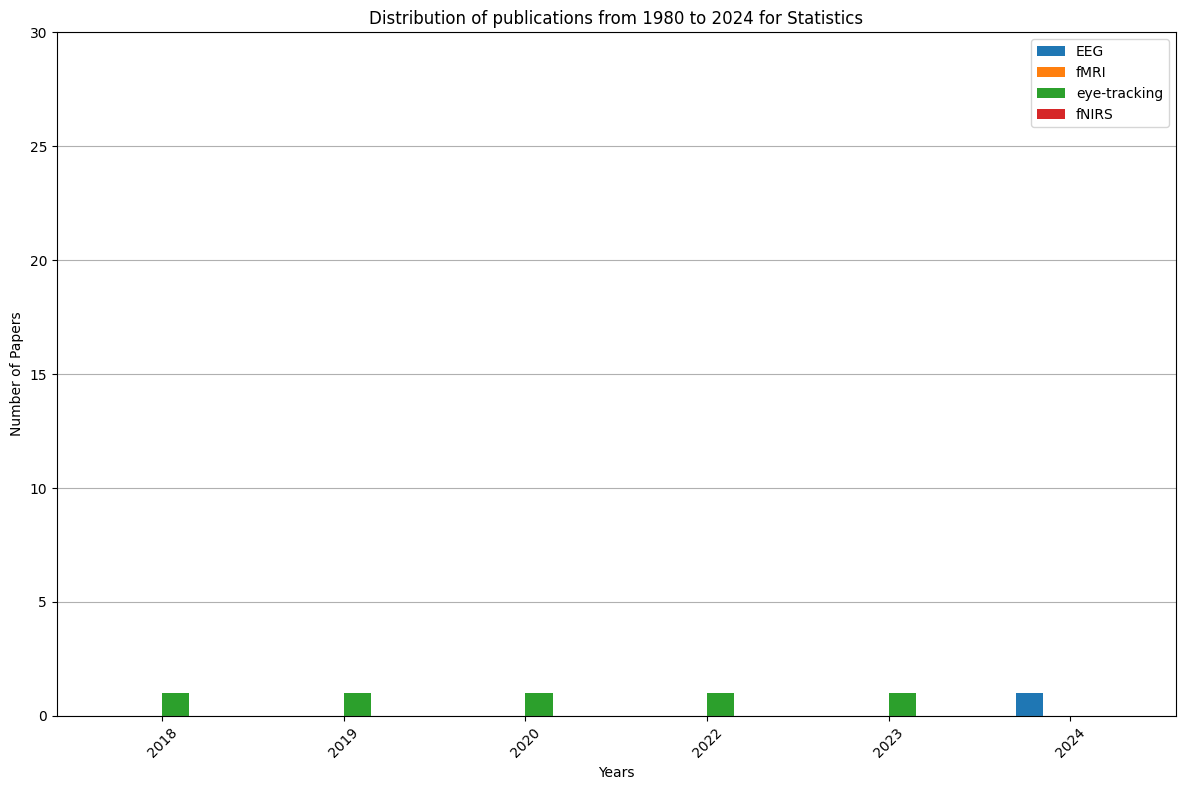


Number of Papers per Search Term and Year:
       math-anxiety  math-giftedness  dyscalculia  Math-abilities  Math-skills  \
2018             4                0            2               0            0   
2019             5                0            0               0            2   
2020             4                0            0               0            1   
2022             5                0            0               1            1   
2023             3                0            1               1            1   
2024             1                0            0               0            0   

      Math-difficulties  
2018                  0  
2019                  1  
2020                  1  
2022                  1  
2023                  1  
2024                  0  


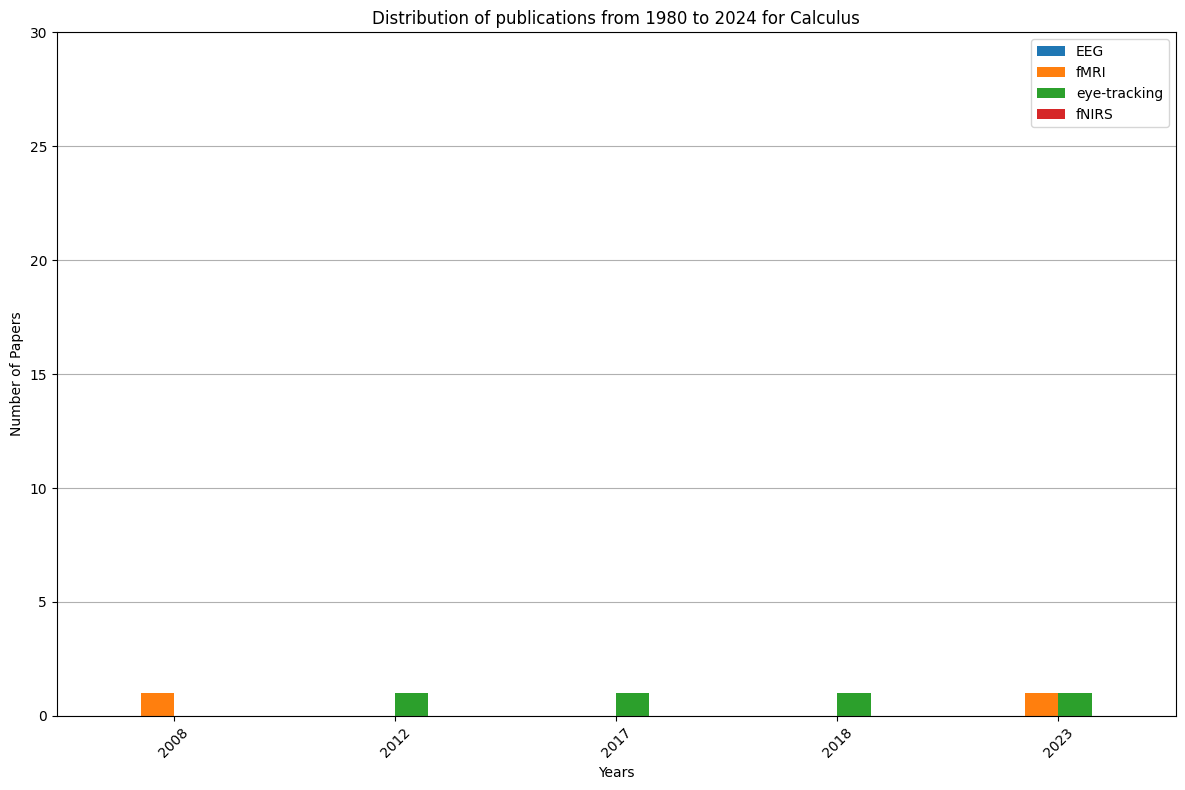


Number of Papers per Search Term and Year:
       math-anxiety  math-giftedness  dyscalculia  Math-abilities  Math-skills  \
2008             0                0            0               0            0   
2012             2                0            1               0            3   
2017             3                0            0               1            0   
2018             4                0            2               0            0   
2023             3                0            1               1            1   

      Math-difficulties  
2008                  0  
2012                  1  
2017                  0  
2018                  0  
2023                  1  


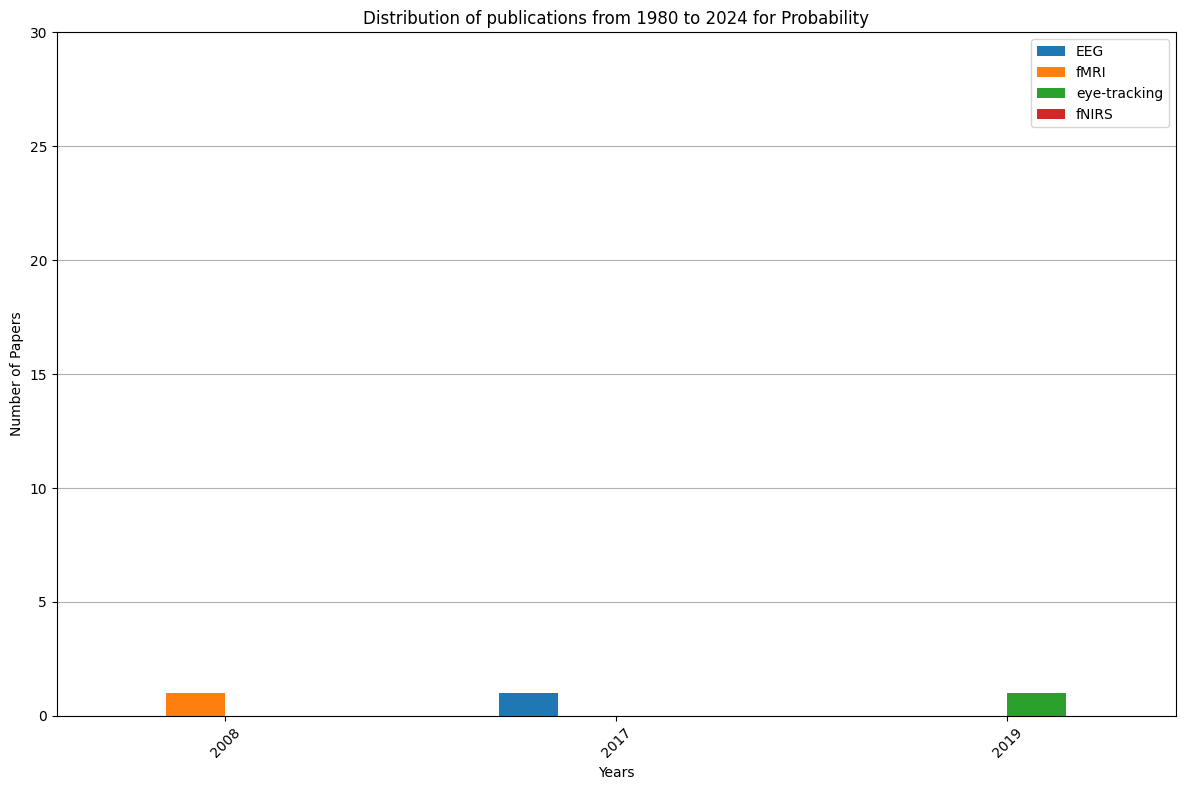


Number of Papers per Search Term and Year:
       math-anxiety  math-giftedness  dyscalculia  Math-abilities  Math-skills  \
2008             0                0            0               0            0   
2017             3                0            0               1            0   
2019             5                0            0               0            2   

      Math-difficulties  
2008                  0  
2017                  0  
2019                  1  


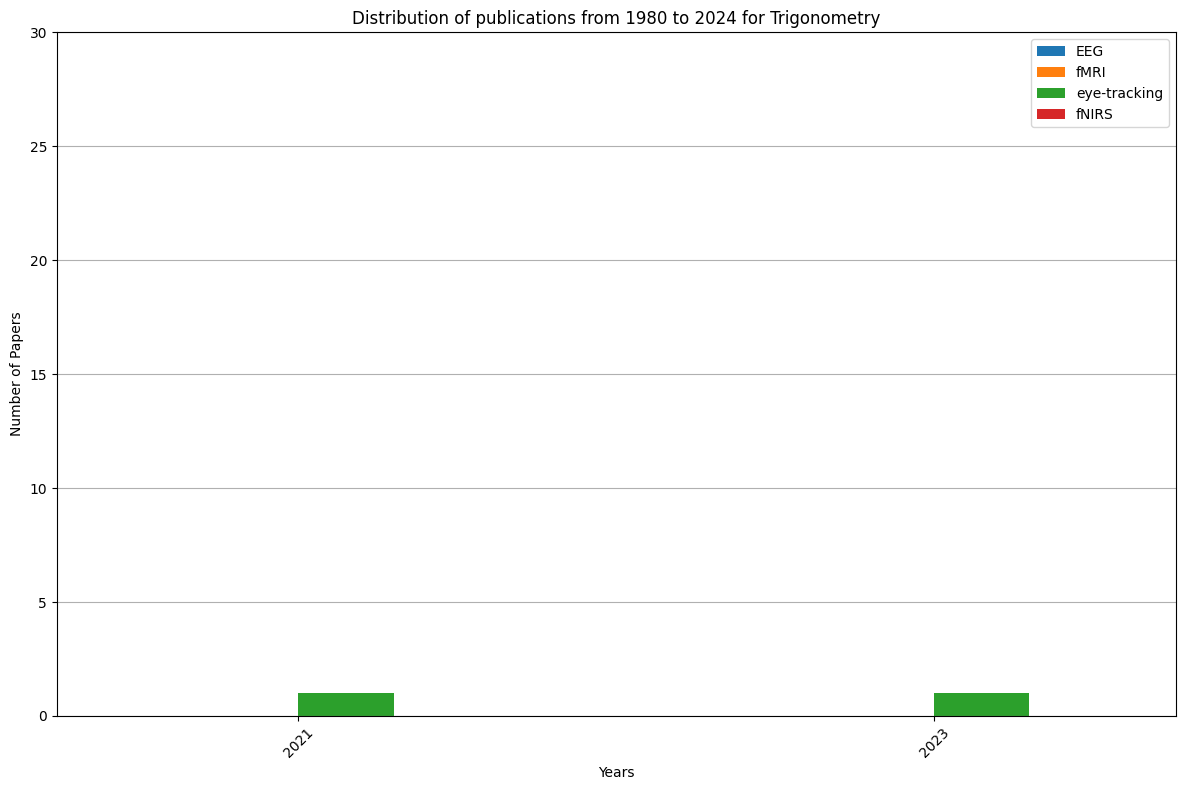


Number of Papers per Search Term and Year:
       math-anxiety  math-giftedness  dyscalculia  Math-abilities  Math-skills  \
2021             2                0            2               2            0   
2023             3                0            1               1            1   

      Math-difficulties  
2021                  1  
2023                  1  


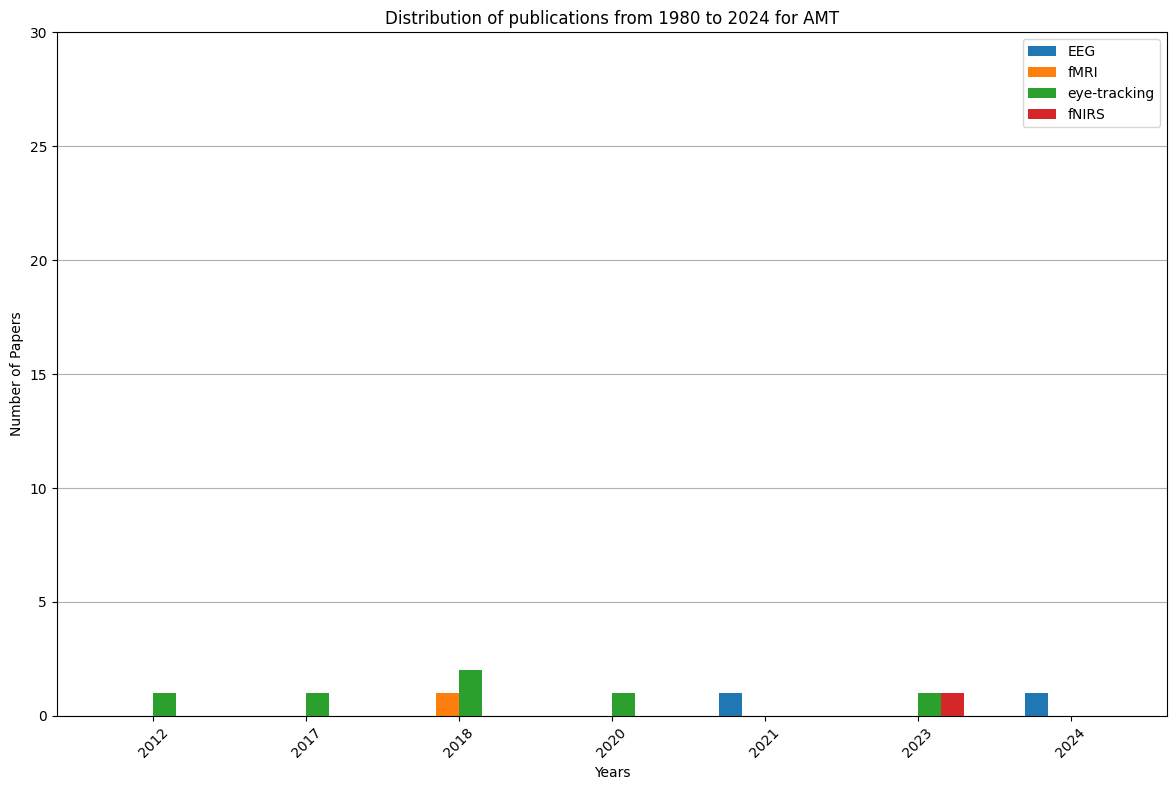


Number of Papers per Search Term and Year:
       math-anxiety  math-giftedness  dyscalculia  Math-abilities  Math-skills  \
2012             2                0            1               0            3   
2017             3                0            0               1            0   
2018             4                0            2               0            0   
2020             4                0            0               0            1   
2021             2                0            2               2            0   
2023             3                0            1               1            1   
2024             1                0            0               0            0   

      Math-difficulties  
2012                  1  
2017                  0  
2018                  0  
2020                  1  
2021                  1  
2023                  1  
2024                  0  


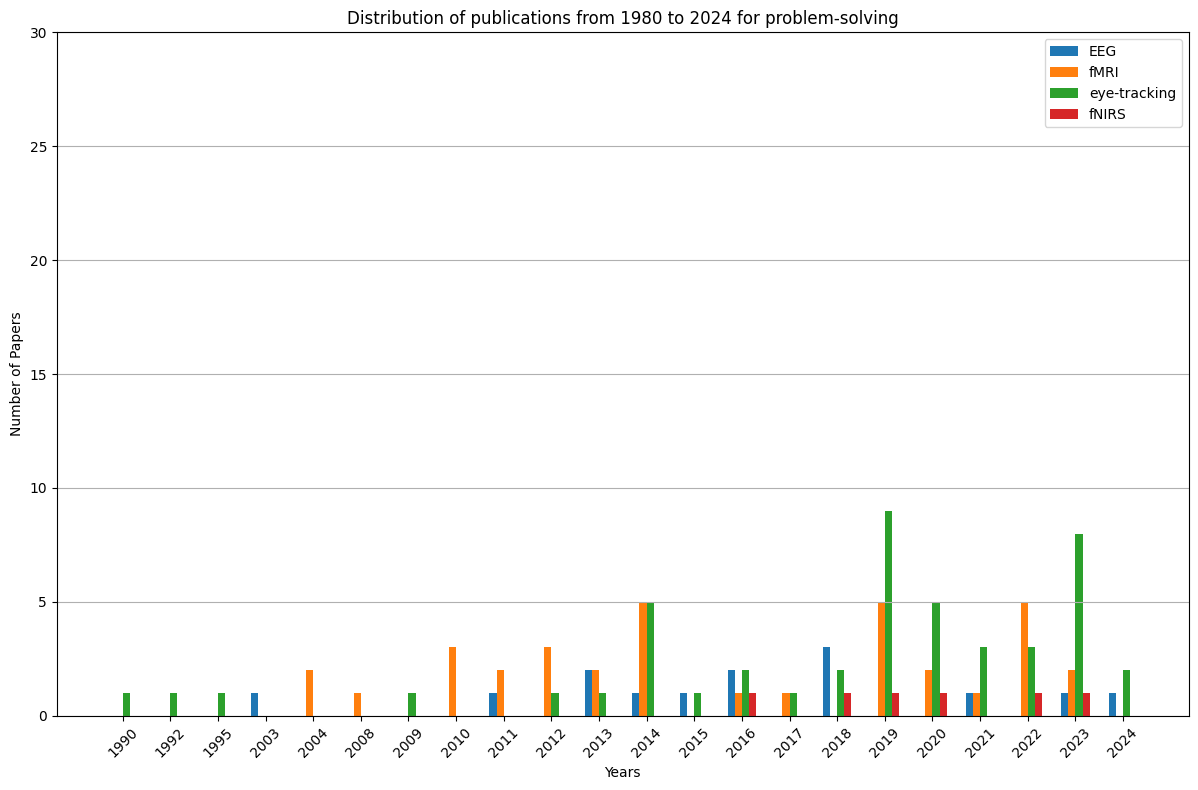


Number of Papers per Search Term and Year:
       math-anxiety  math-giftedness  dyscalculia  Math-abilities  Math-skills  \
1990             0                0            0               0            0   
1992             0                0            0               0            0   
1995             0                0            0               0            0   
2003             0                0            0               0            0   
2004             0                0            0               0            0   
2008             0                0            0               0            0   
2009             0                0            5               0            0   
2010             0                0            1               1            0   
2011             0                0            1               1            1   
2012             2                0            1               0            3   
2013             2                0            2               0

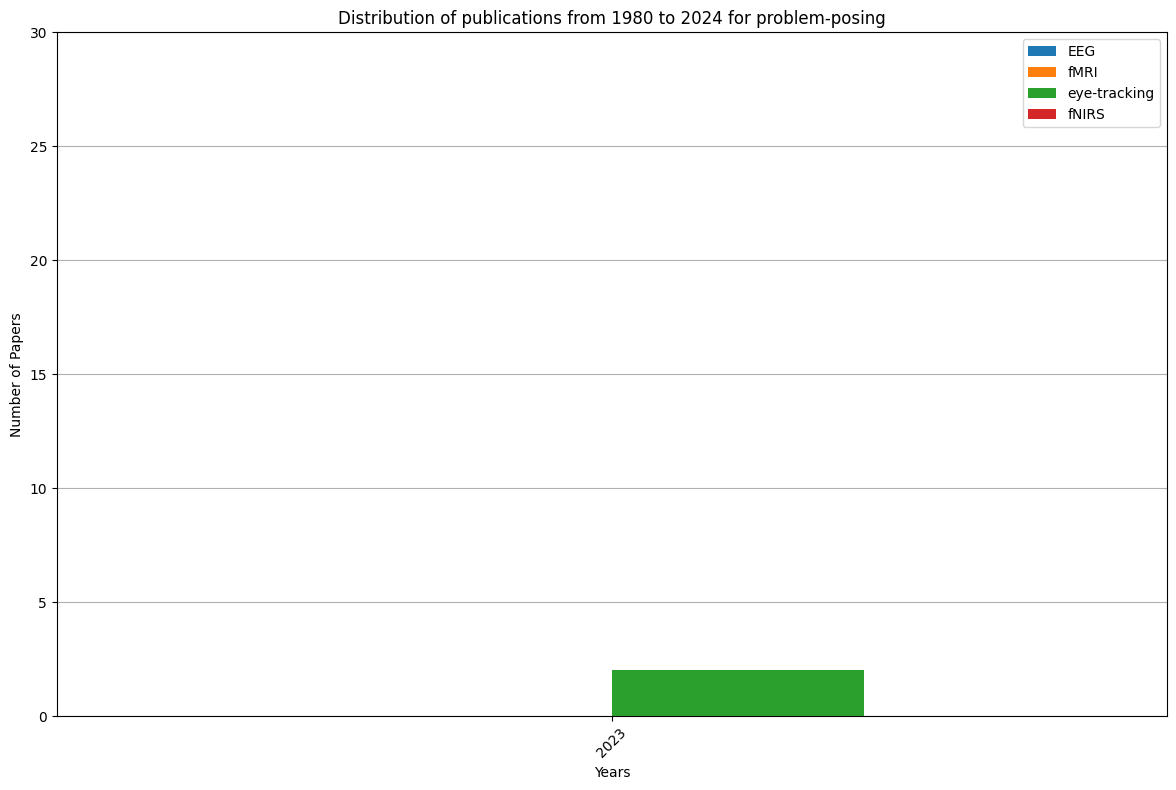


Number of Papers per Search Term and Year:
       math-anxiety  math-giftedness  dyscalculia  Math-abilities  Math-skills  \
2023             3                0            1               1            1   

      Math-difficulties  
2023                  1  


In [74]:
def predicate(math_term, search_term_forms, range):
    year_start, year_end = range
    numeric_year = pd.to_numeric(covidence['Year'])
    contains_search_term = covidence['Author Keywords'].str.contains(search_term_forms)
    contains_math_term = covidence['Author Keywords'].str.contains(math_term.lower())
    year_range = numeric_year.between(year_start, year_end)
    return contains_math_term & contains_search_term & year_range

year_ranges = [(1980, 2024)]

for math_term in math_terms:
    for year_range in year_ranges:
        # Initialize an empty dictionary to store counts for each term per year
        term_counts_per_year = {}
        for search_term, forms in search_terms.items():
            relevant_rows = covidence[predicate(math_term, forms, year_range)]
            published_year_column = relevant_rows['Year']
            term_counts_per_year[search_term] = published_year_column.value_counts().sort_index()
        
        # Ensure all years are included in the plots
        years = sorted(set().union(*[counts.index for counts in term_counts_per_year.values()]))
        
        # Plot the data
        plt.figure(figsize=(12, 8))
        width = 0.15  # Width of each bar
        margin = 1
        # Positions of the bars on the x-axis
        positions = {
            term: [(i + idx * width) * margin for i in range(len(years))] 
            for idx, term in enumerate(search_terms.keys())
        }
        
        for term, counts in term_counts_per_year.items():
            counts = counts.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
            plt.bar(positions[term], counts.values, width=width, label=term)
        
        # Adjust x-ticks to be in the center of grouped bars
        plt.xticks([(i + width * (len(search_terms.keys())-1)/2) * margin for i in range(len(years))], years, rotation=45)
        
        plt.title(f'Distribution of publications from {year_range[0]} to {year_range[1]} for {math_term}')
        plt.xlabel('Years')
        plt.ylabel('Number of Papers')
        plt.legend()
        plt.grid(axis='y')
        plt.tight_layout()
        plt.ylim(0, 30)
        plt.show()
        
        # Display number of articles per search term and year in a table
        article_counts = pd.DataFrame(index=years)
        
        for term in psycho_terms:
            term_counts_per_year = covidence[covidence['Author Keywords'].str.contains(term.lower())]['Year'].value_counts().sort_index()
            term_counts_per_year = term_counts_per_year.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
            article_counts[term] = term_counts_per_year
        
        print("\nNumber of Papers per Search Term and Year:\n", article_counts)


# 8.Distribution of publications from 1980 to 2024 for each psychological topic

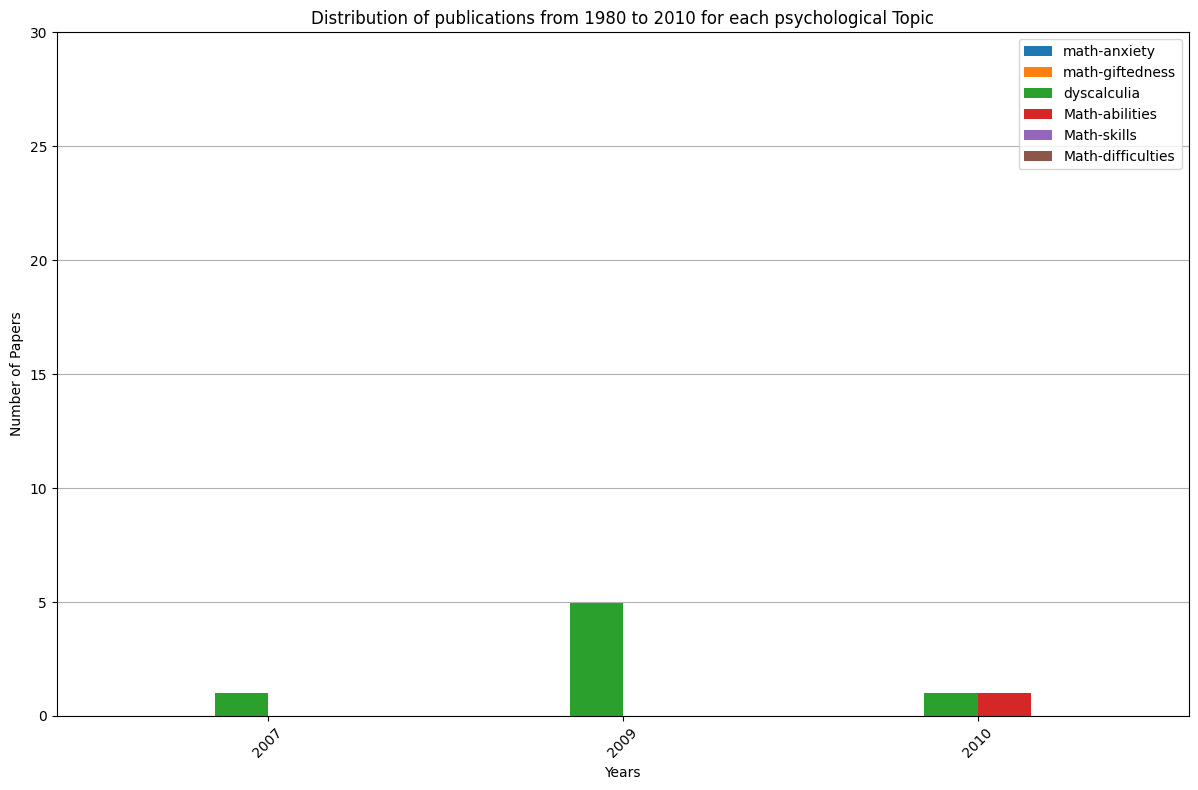


Number of Papers per Search Term and Year:
       math-anxiety  math-giftedness  dyscalculia  Math-abilities  Math-skills  \
2007             0                0            1               0            0   
2009             0                0            5               0            0   
2010             0                0            1               1            0   

      Math-difficulties  
2007                  0  
2009                  0  
2010                  0  


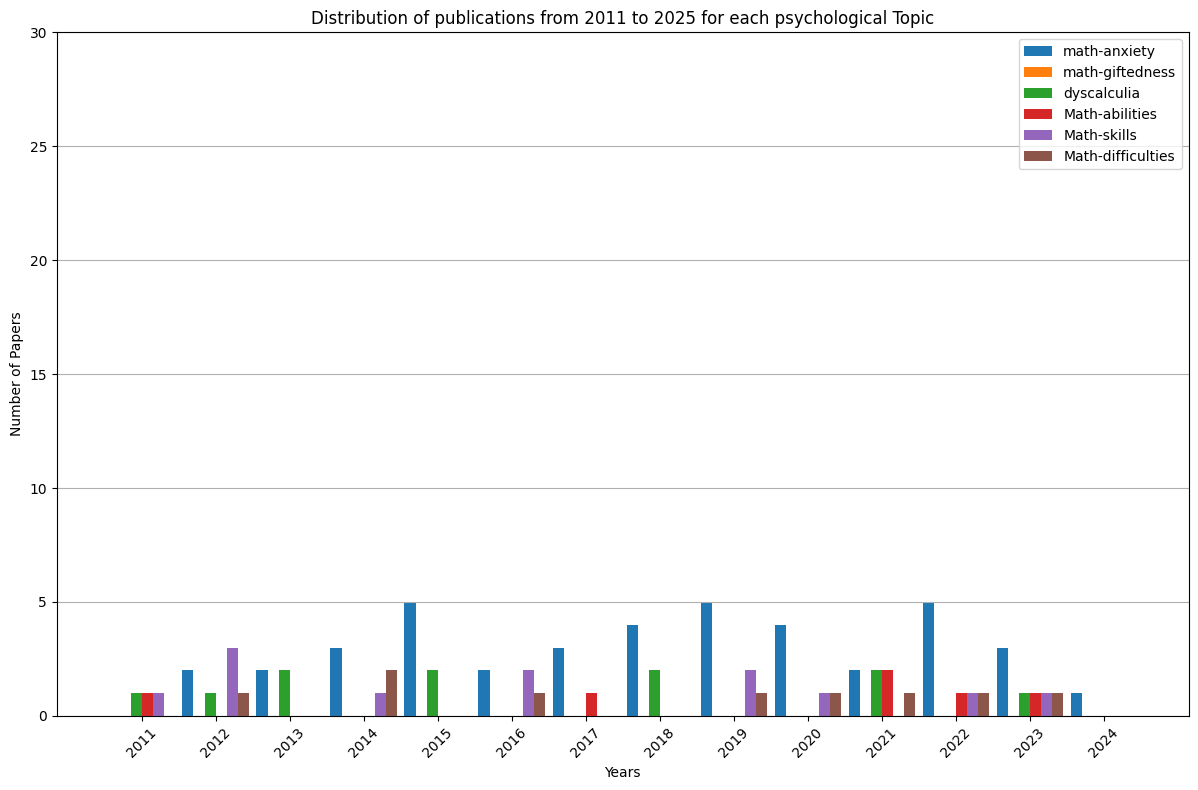


Number of Papers per Search Term and Year:
       math-anxiety  math-giftedness  dyscalculia  Math-abilities  Math-skills  \
2011             0                0            1               1            1   
2012             2                0            1               0            3   
2013             2                0            2               0            0   
2014             3                0            0               0            1   
2015             5                0            2               0            0   
2016             2                0            0               0            2   
2017             3                0            0               1            0   
2018             4                0            2               0            0   
2019             5                0            0               0            2   
2020             4                0            0               0            1   
2021             2                0            2               2

In [75]:
# Convert 'Author keywords' column to lowercase and replace 'mri' with 'fmri' for uniformity
covidence['Author Keywords'] = covidence['Author Keywords'].str.lower().str.replace('mri', 'fmri')
covidence['Author Keywords'] = covidence['Author Keywords'].str.lower().str.replace('eeg|erp|erd', 'eeg', regex=True)

def predicate(term, range):
    year_start, year_end = range
    numeric_year = pd.to_numeric(covidence['Year'])
    contains_term = covidence['Author Keywords'].str.contains(term.lower())
    year_range = numeric_year.between(year_start, year_end)
    return contains_term & year_range

year_ranges = [
    (1980, 2010),
    (2011, 2025)
]

for year_range in year_ranges:
    # Initialize an empty dictionary to store counts for each term per year
    term_counts_per_year = {}
    for term in psycho_terms:
        relevant_rows = covidence[predicate(term, year_range)]
        published_year_column = relevant_rows['Year']
        term_counts_per_year[term] = published_year_column.value_counts().sort_index()
    
    # Ensure all years are included in the plots
    years = sorted(set().union(*[counts.index for counts in term_counts_per_year.values()]))
    
    # Plot the data
    plt.figure(figsize=(12, 8))
    width = 0.15  # Width of each bar
    margin = 1
    # Positions of the bars on the x-axis
    positions = {term: [(i + idx * width) * margin for i in range(len(years))] for idx, term in enumerate(psycho_terms)}
    
    for term, counts in term_counts_per_year.items():
        counts = counts.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
        plt.bar(positions[term], counts.values, width=width, label=term)
    
    # Adjust x-ticks to be in the center of grouped bars
    plt.xticks([(i + width * (len(psycho_terms)-1)/2) * margin for i in range(len(years))], years, rotation=45)
    
    plt.title(f'Distribution of publications from {year_range[0]} to {year_range[1]} for each psychological Topic')
    plt.xlabel('Years')
    plt.ylabel('Number of Papers')
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.ylim(0, 30)
    plt.show()
    
    # Display number of articles per search term and year in a table
    article_counts = pd.DataFrame(index=years)
    
    for term in psycho_terms:
        term_counts_per_year = covidence[covidence['Author Keywords'].str.contains(term.lower())]['Year'].value_counts().sort_index()
        term_counts_per_year = term_counts_per_year.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
        article_counts[term] = term_counts_per_year
    
    print("\nNumber of Papers per Search Term and Year:\n", article_counts)


# 9.1 Number of Mathematical Topics for each tool

Algebra {'EEG': 10, 'fMRI': 33, 'eye-tracking': 16, 'fNIRS': 0}


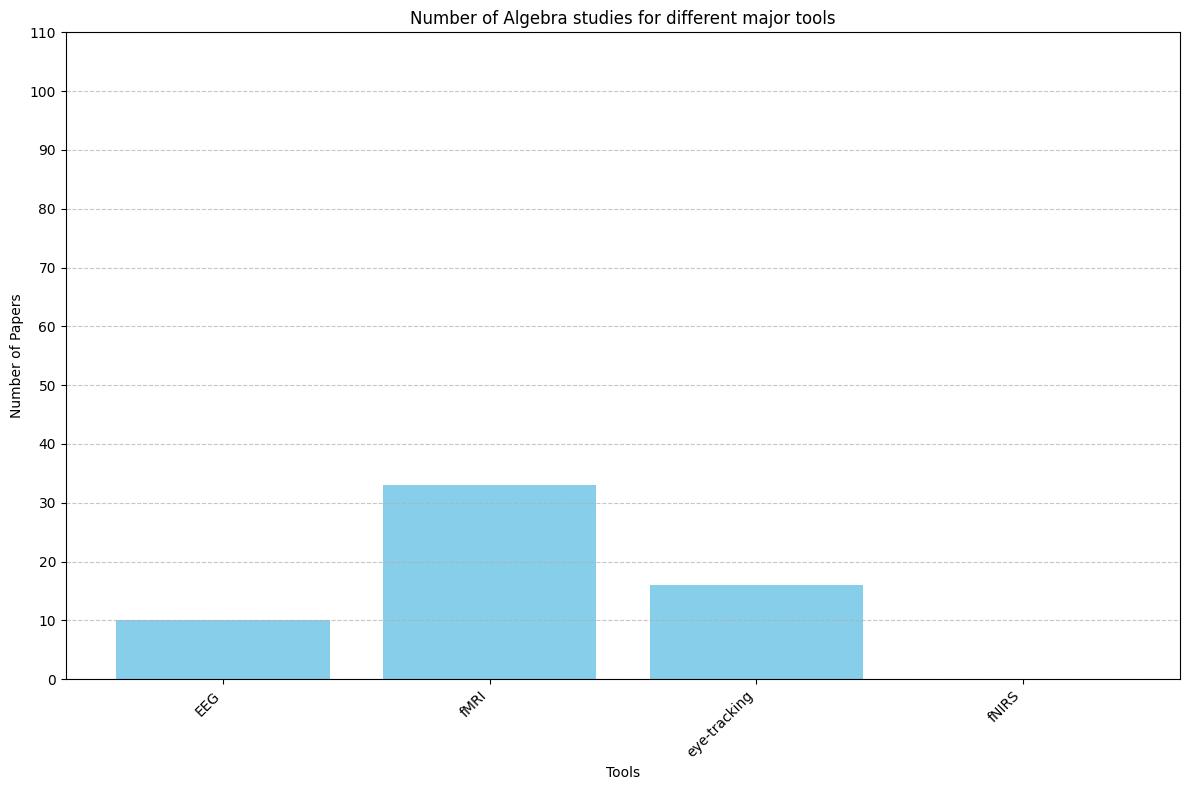

Geometry {'EEG': 8, 'fMRI': 8, 'eye-tracking': 33, 'fNIRS': 3}


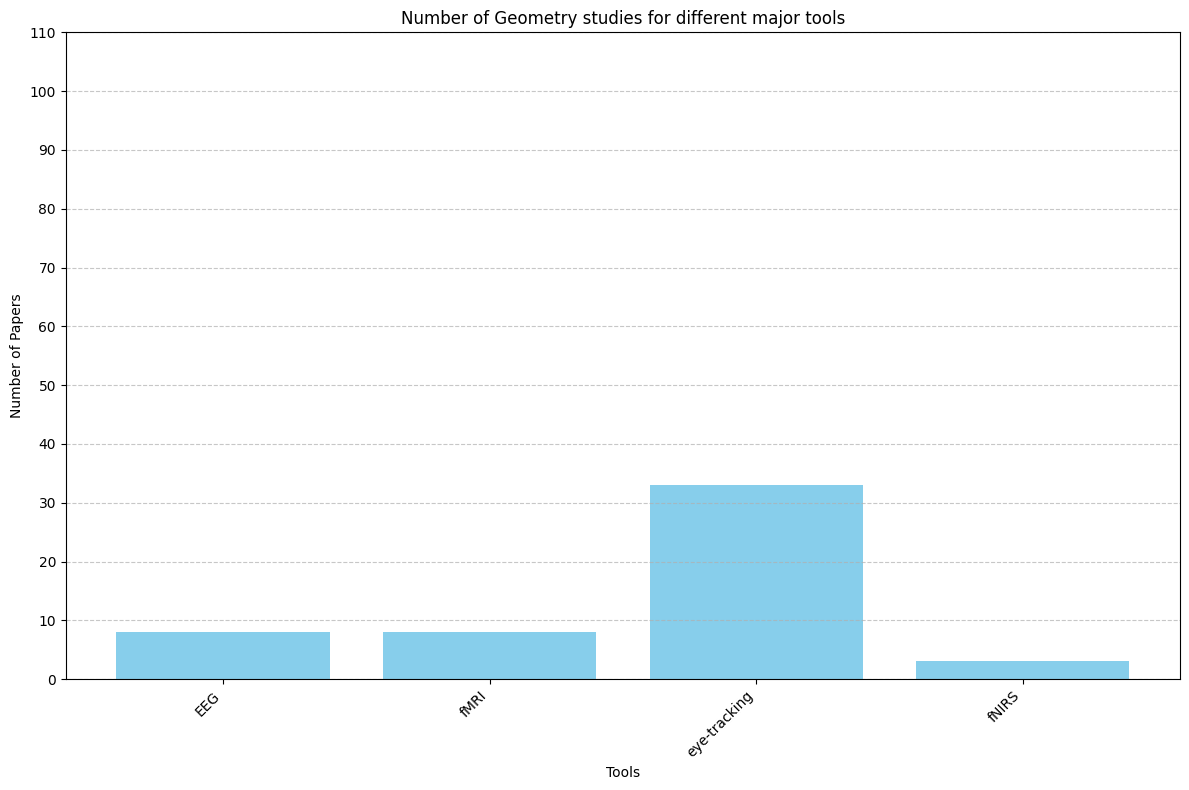

Arithmetic {'EEG': 96, 'fMRI': 137, 'eye-tracking': 42, 'fNIRS': 22}


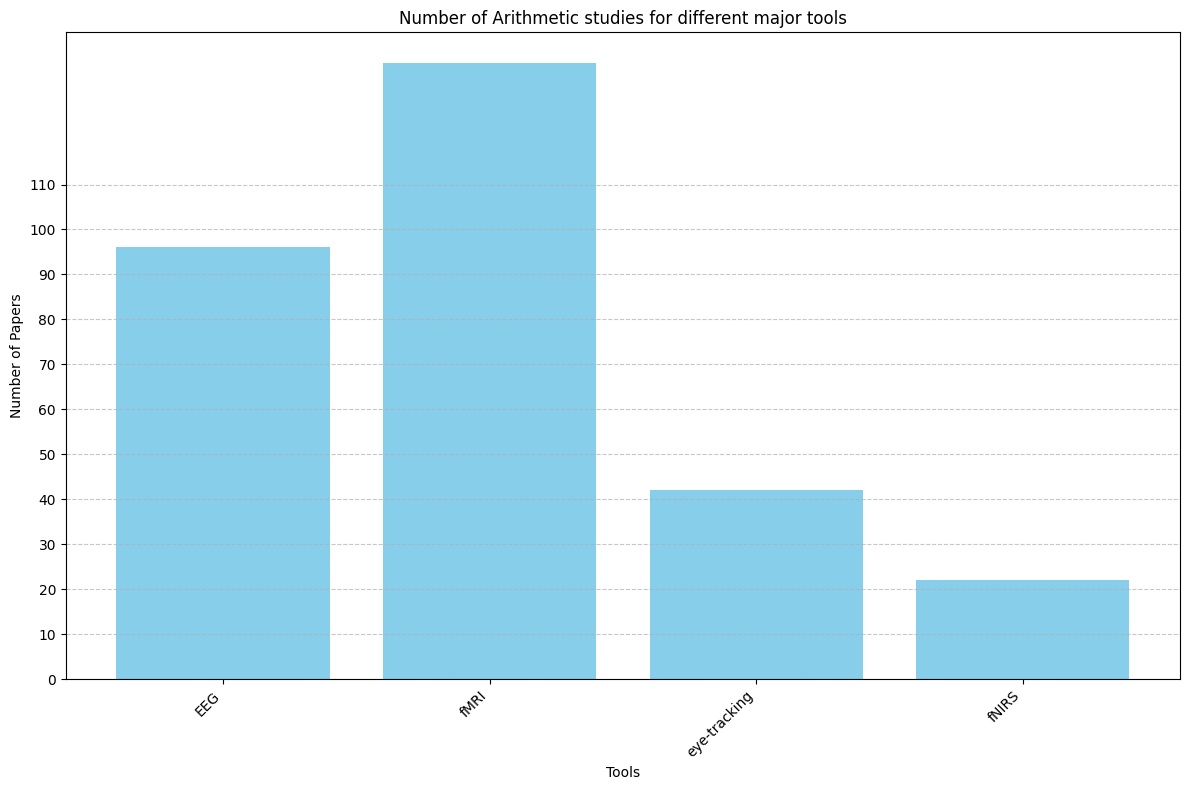

Numeracy {'EEG': 16, 'fMRI': 20, 'eye-tracking': 7, 'fNIRS': 1}


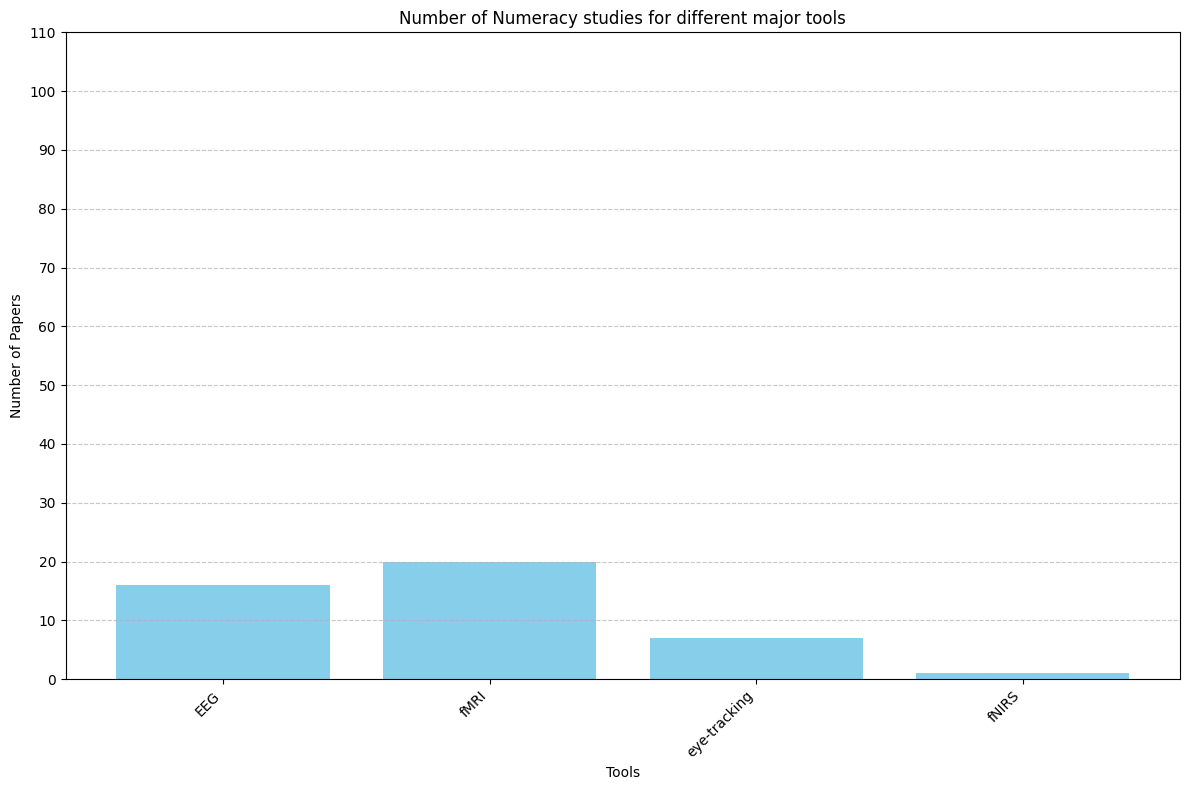

Statistics {'EEG': 1, 'fMRI': 0, 'eye-tracking': 5, 'fNIRS': 0}


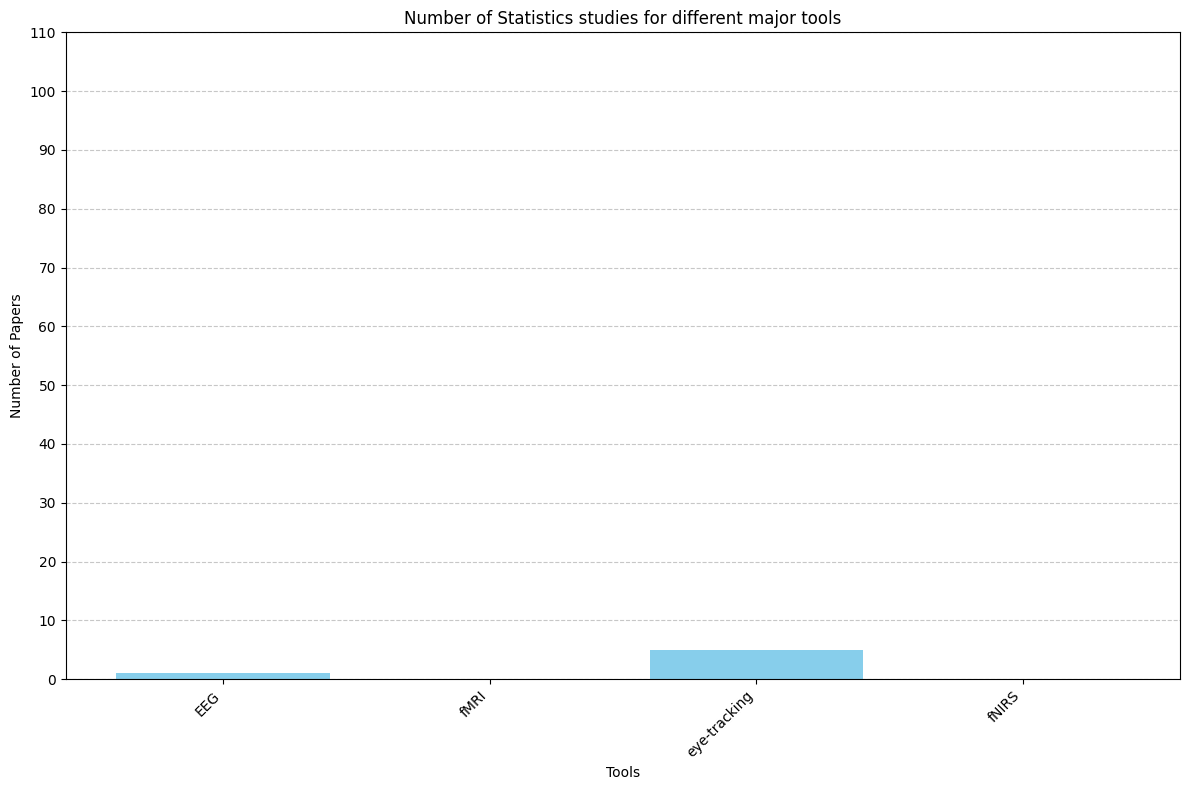

Calculus {'EEG': 0, 'fMRI': 2, 'eye-tracking': 4, 'fNIRS': 0}


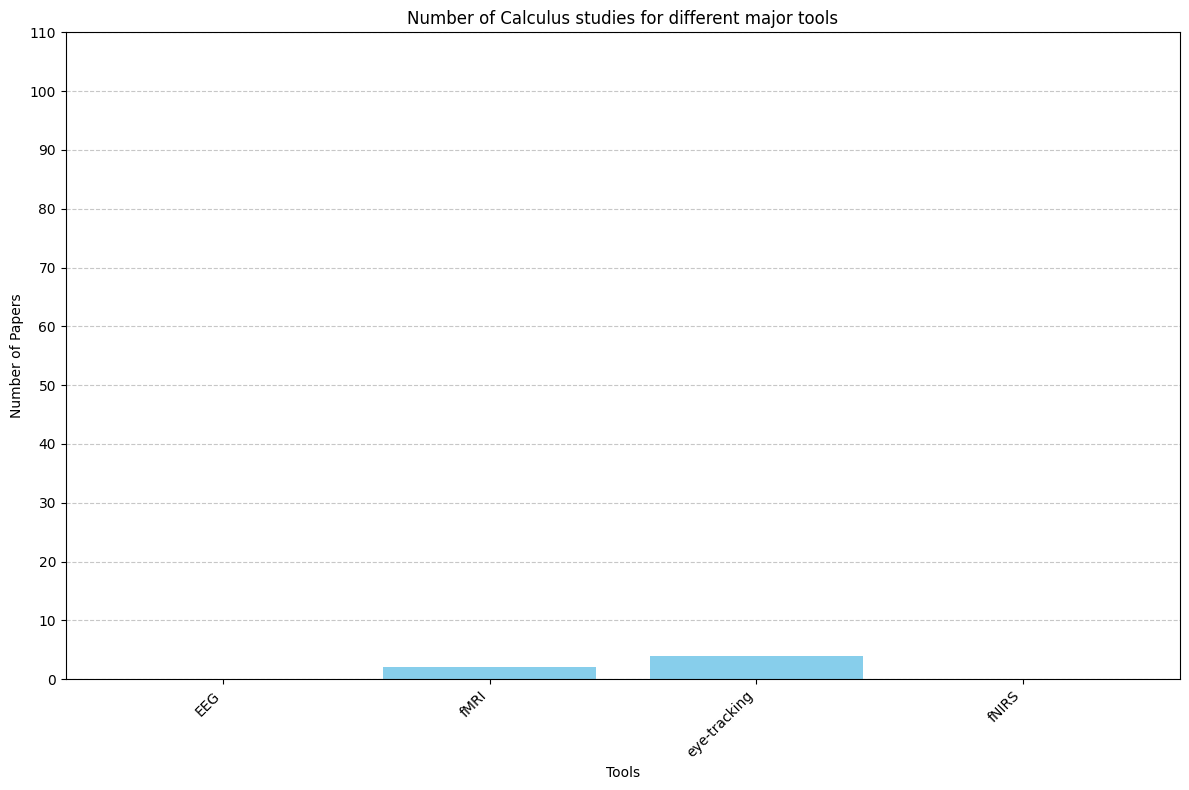

Probability {'EEG': 1, 'fMRI': 1, 'eye-tracking': 1, 'fNIRS': 0}


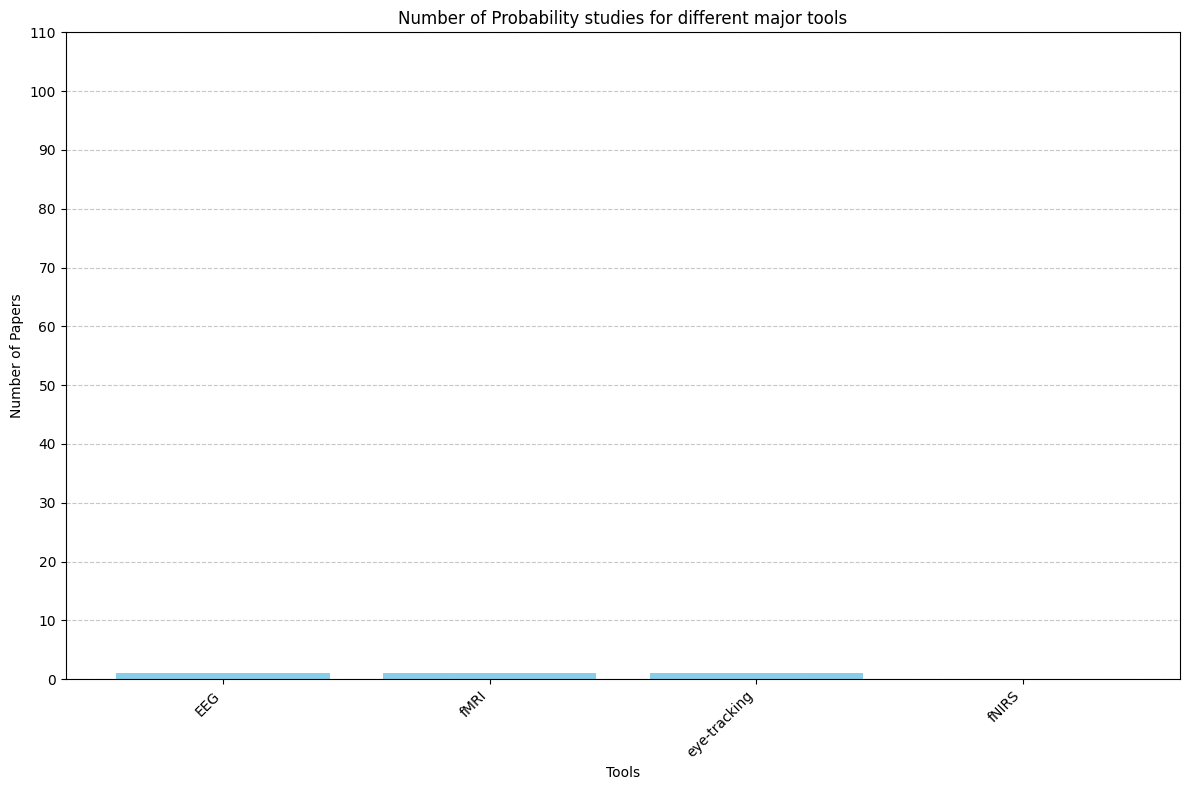

Trigonometry {'EEG': 0, 'fMRI': 0, 'eye-tracking': 2, 'fNIRS': 0}


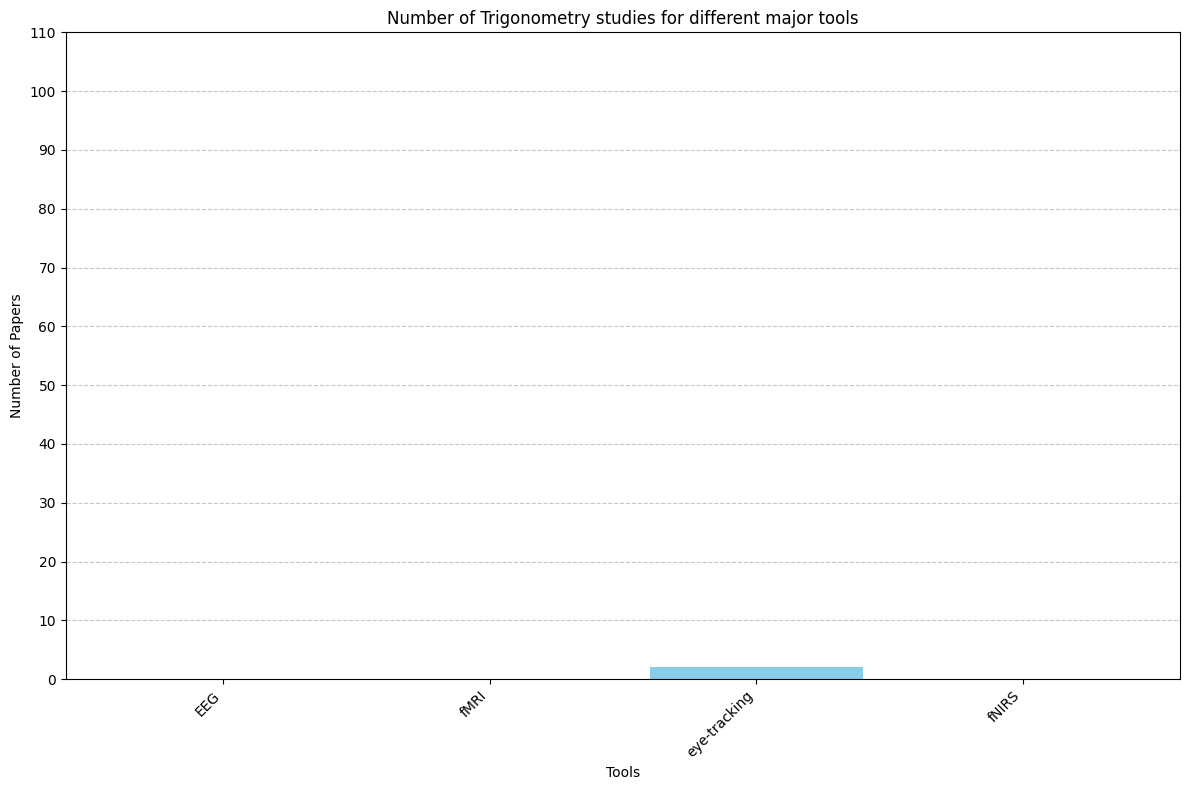

AMT {'EEG': 2, 'fMRI': 1, 'eye-tracking': 6, 'fNIRS': 1}


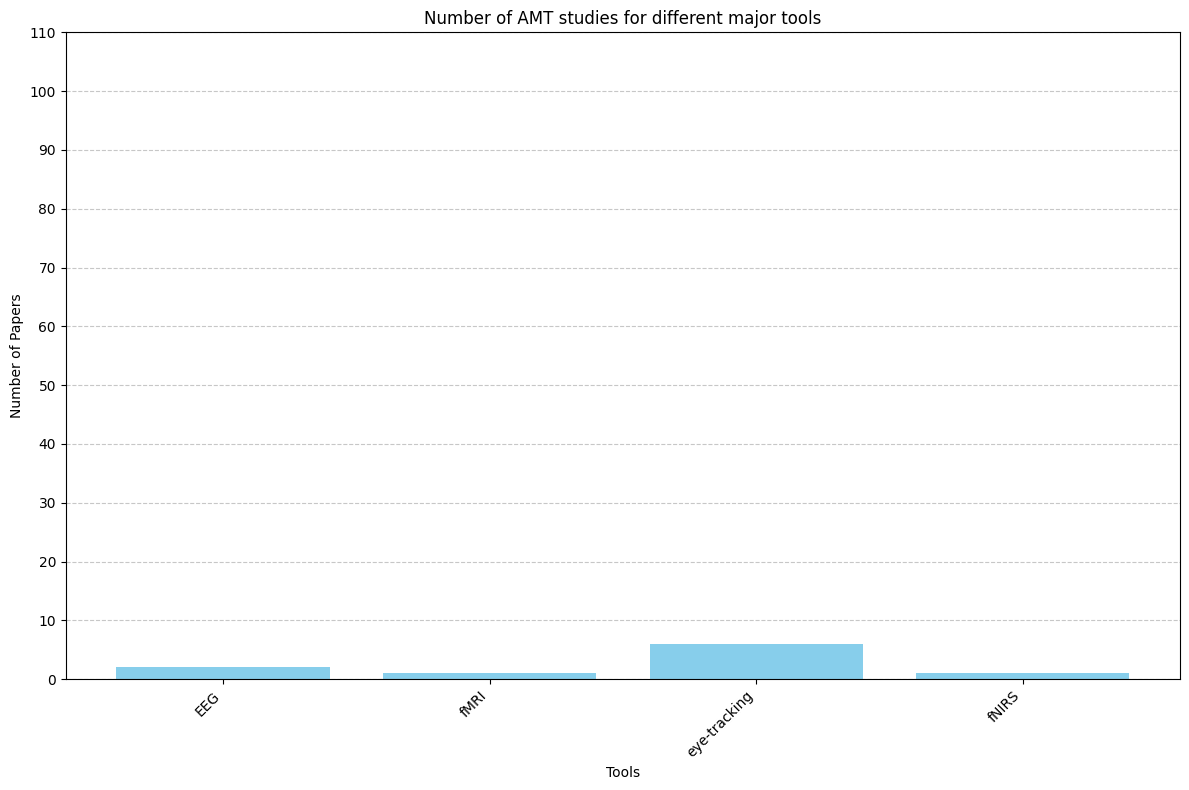

problem-solving {'EEG': 14, 'fMRI': 35, 'eye-tracking': 47, 'fNIRS': 6}


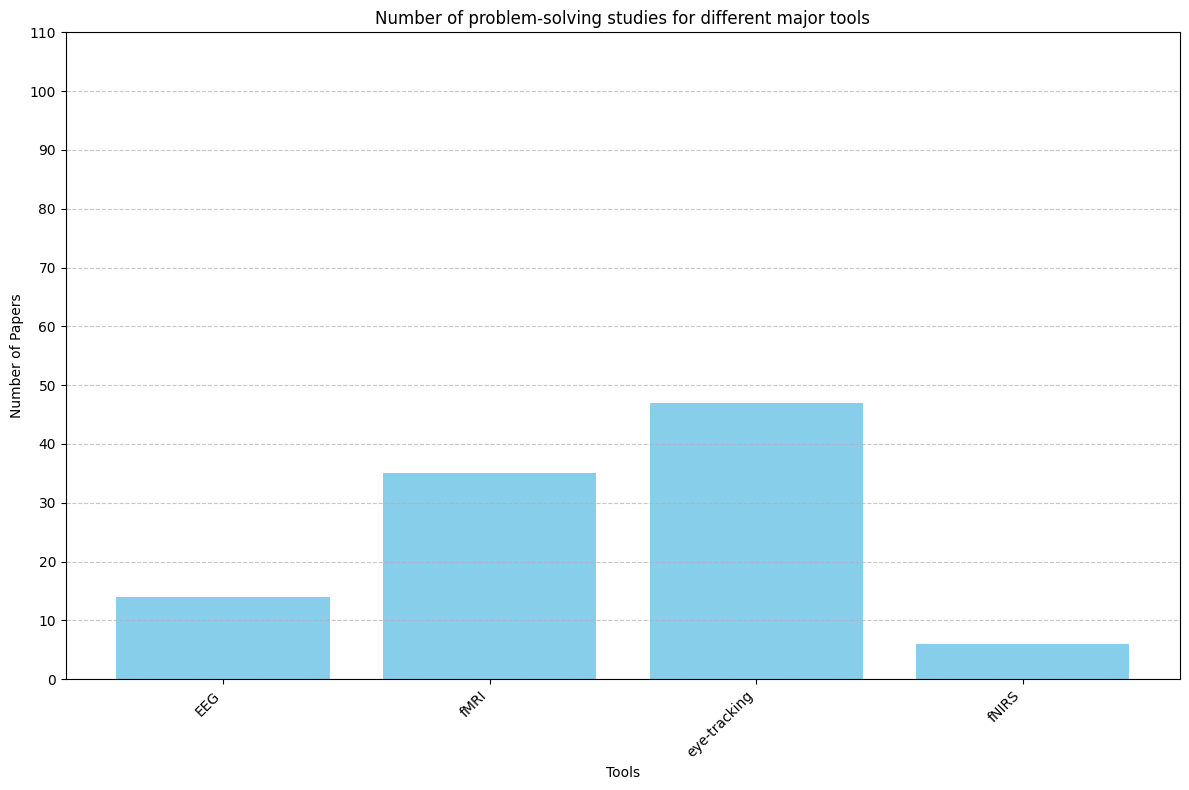

problem-posing {'EEG': 0, 'fMRI': 0, 'eye-tracking': 2, 'fNIRS': 0}


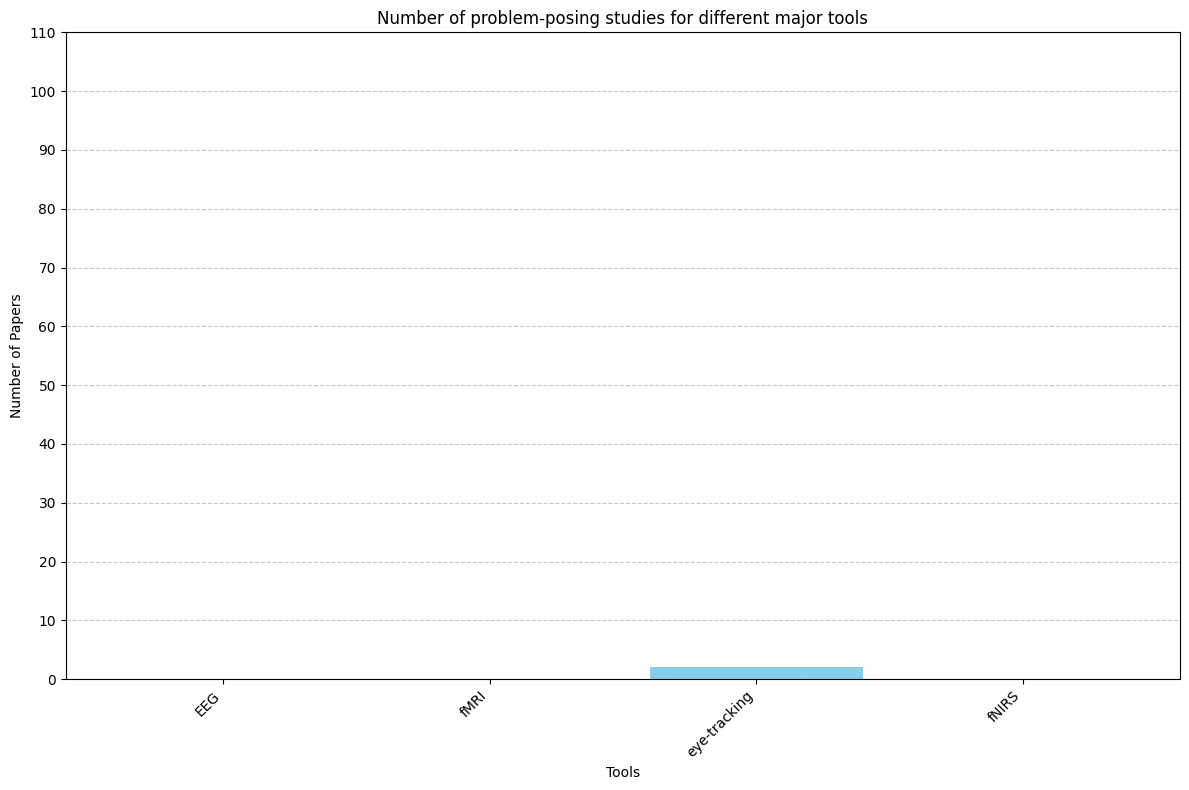

In [76]:
for math_term in math_terms:
    relevant_rows = covidence[covidence['Author Keywords'].str.lower().str.contains(math_term.lower())]
        
    search_terms_counts = {}
    for search_term, forms in search_terms.items():
        lower_keywords = relevant_rows['Author Keywords'].str.lower()
        contains_column = lower_keywords.str.contains(forms)  # column: True, True, False, False ...
        count_of_search_term = contains_column.sum()
        search_terms_counts[search_term] = count_of_search_term
    
    print(math_term, search_terms_counts)

    plt.figure(figsize=(12, 8))
    plt.bar(search_terms_counts.keys(), search_terms_counts.values(), color='skyblue')
    plt.title(f'Number of {math_term} studies for different major tools')
    plt.xlabel('Tools')
    plt.ylabel('Number of Papers')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(np.arange(0, 120, 10))
    plt.tight_layout()
    plt.show()

# 9.2 Number of Psychological Topics for each tool

math-anxiety {'EEG': 21, 'fMRI': 12, 'eye-tracking': 5, 'fNIRS': 1}


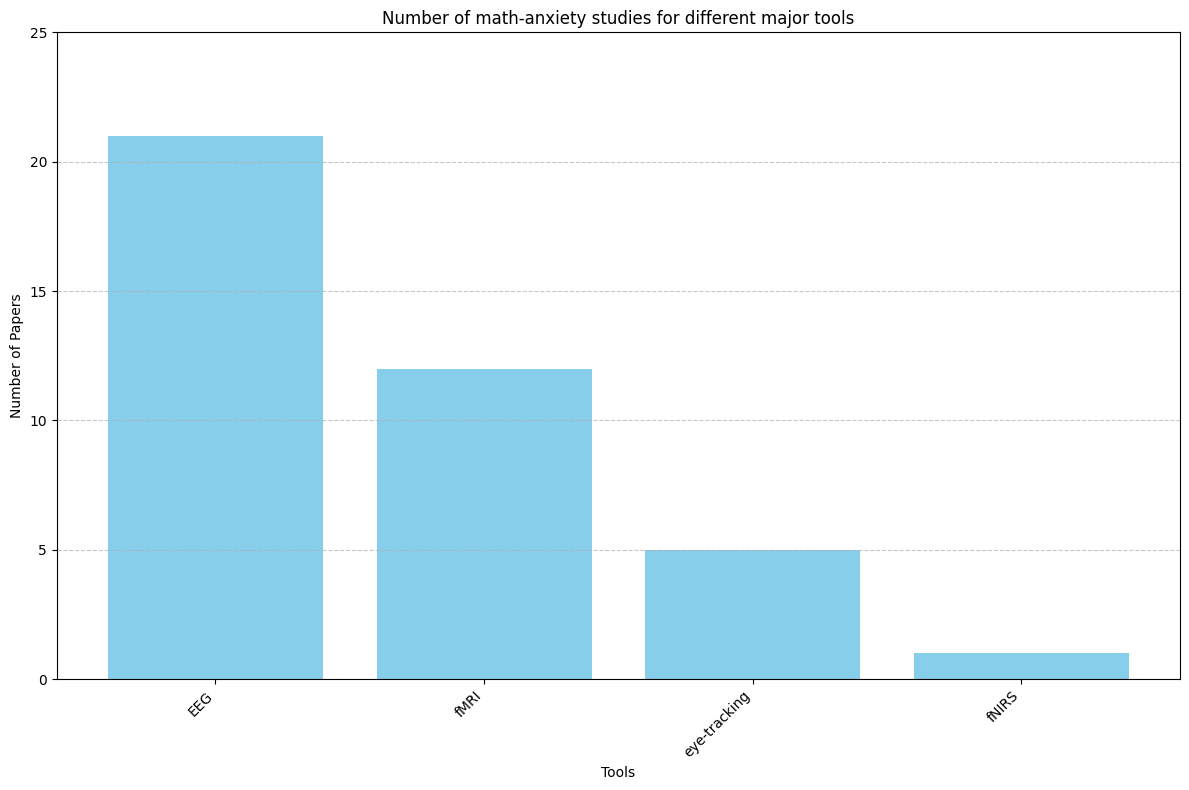

math-giftedness {'EEG': 0, 'fMRI': 0, 'eye-tracking': 0, 'fNIRS': 0}


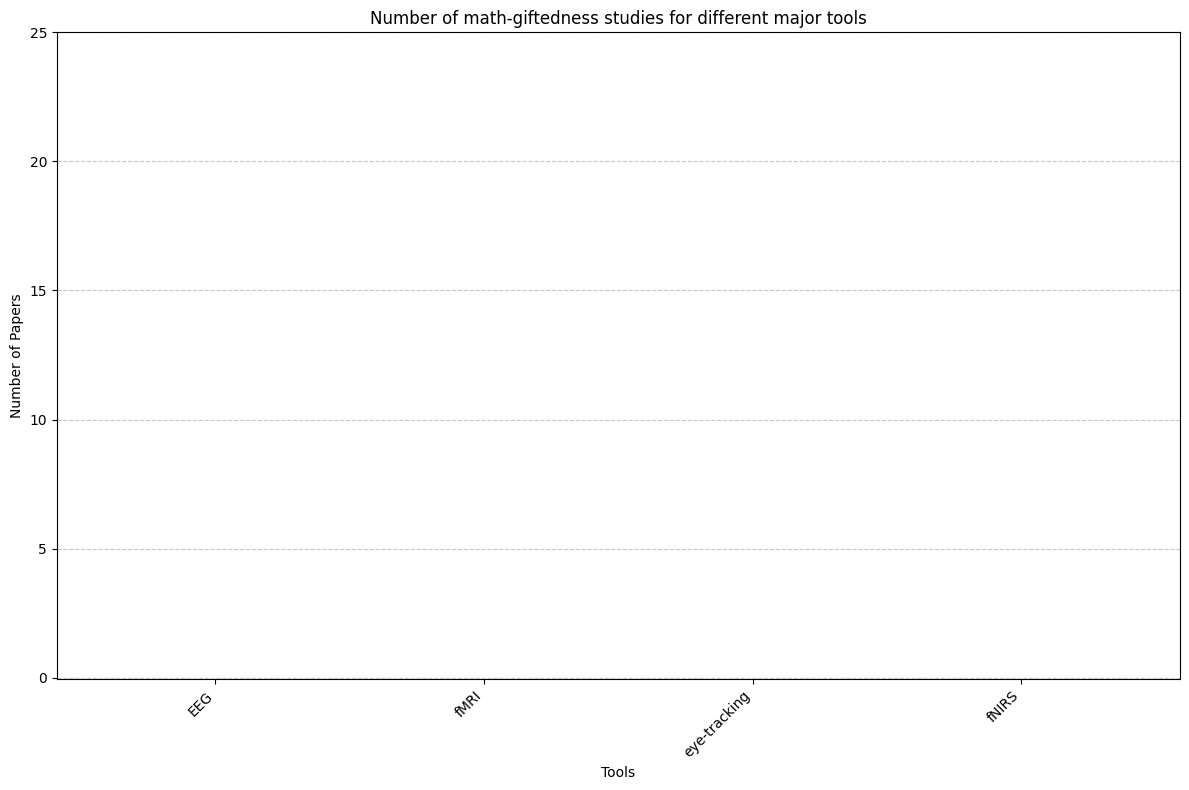

dyscalculia {'EEG': 3, 'fMRI': 12, 'eye-tracking': 2, 'fNIRS': 0}


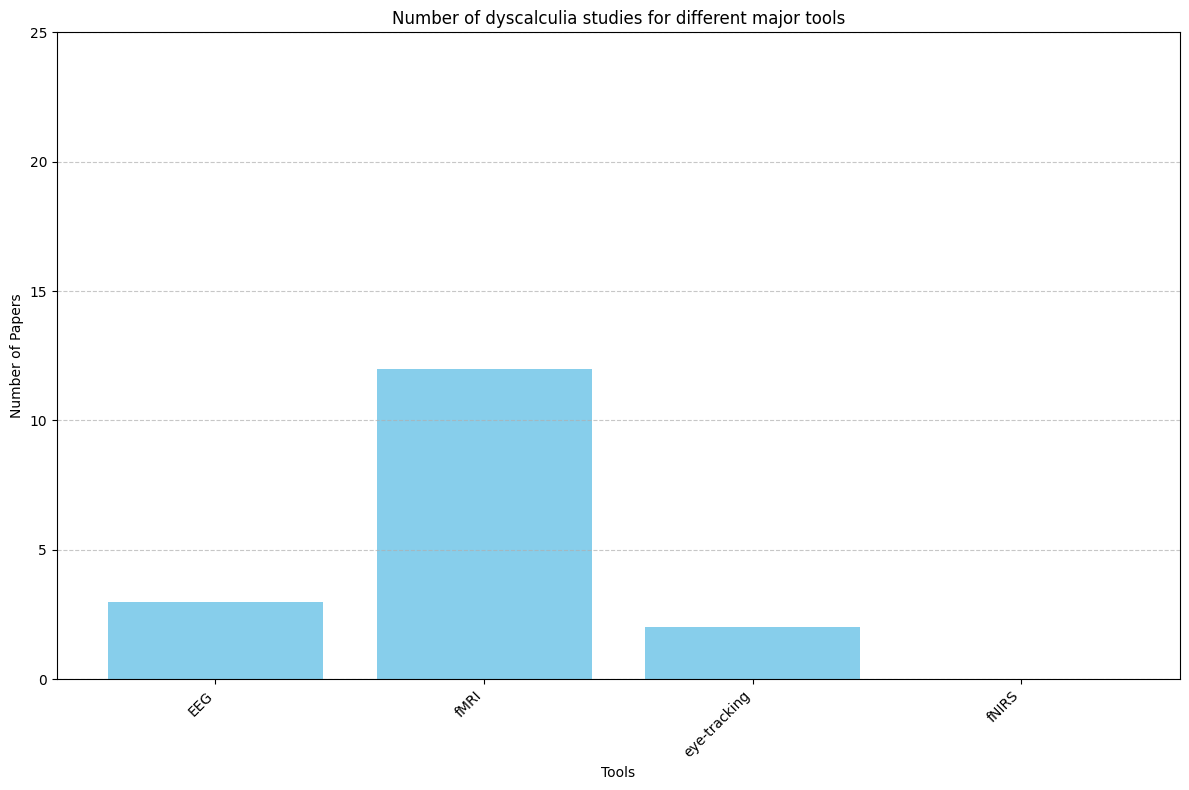

Math-abilities {'EEG': 2, 'fMRI': 5, 'eye-tracking': 0, 'fNIRS': 0}


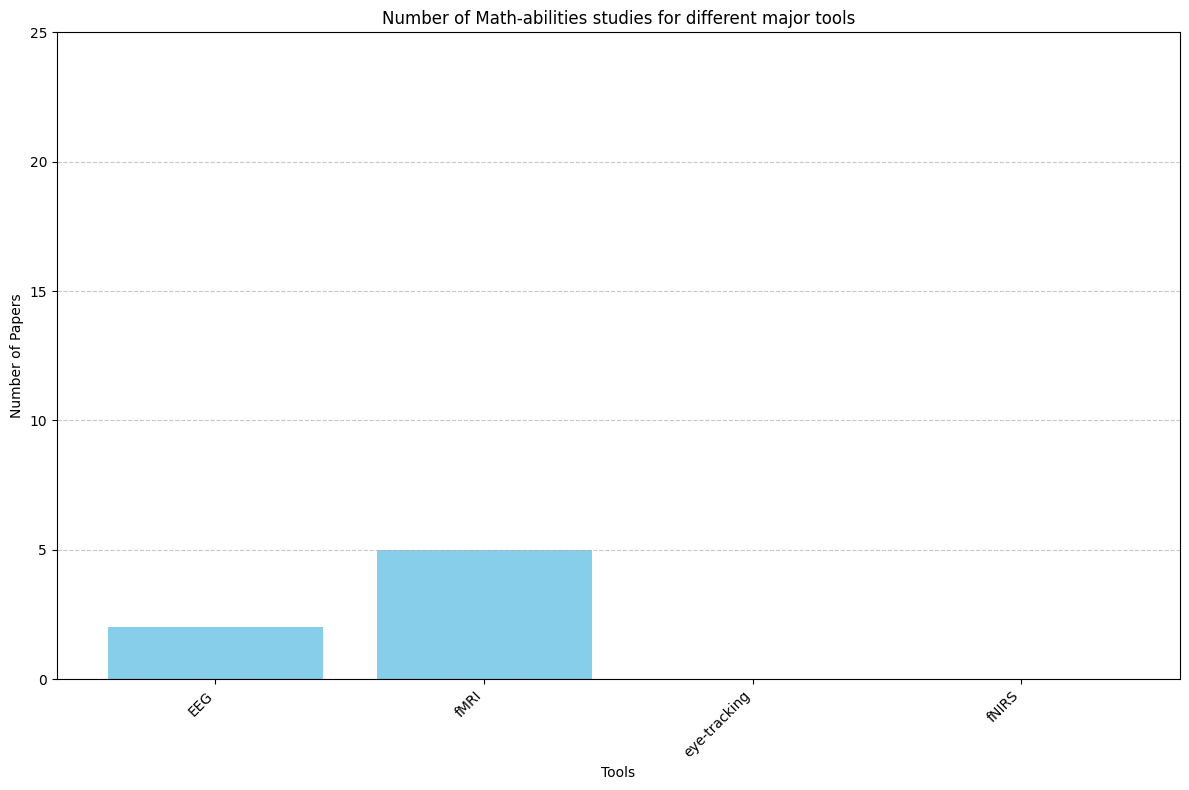

Math-skills {'EEG': 5, 'fMRI': 3, 'eye-tracking': 4, 'fNIRS': 0}


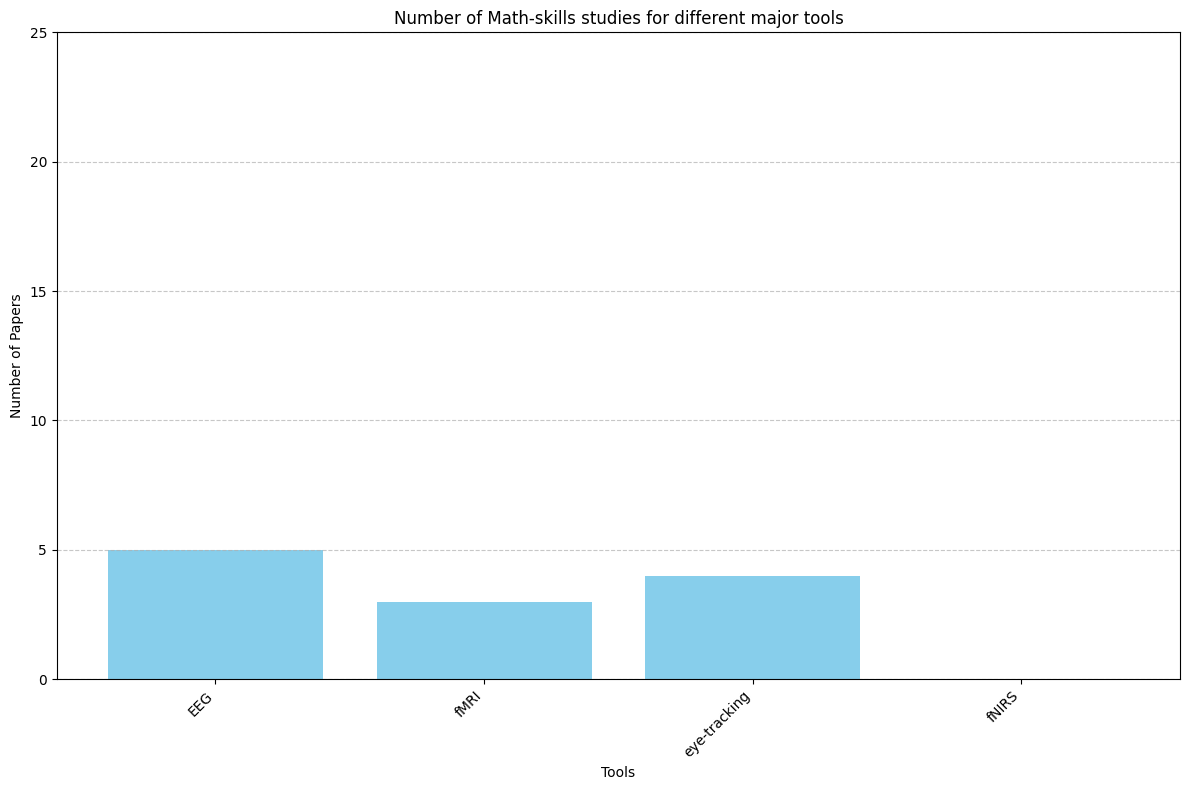

Math-difficulties {'EEG': 2, 'fMRI': 2, 'eye-tracking': 4, 'fNIRS': 1}


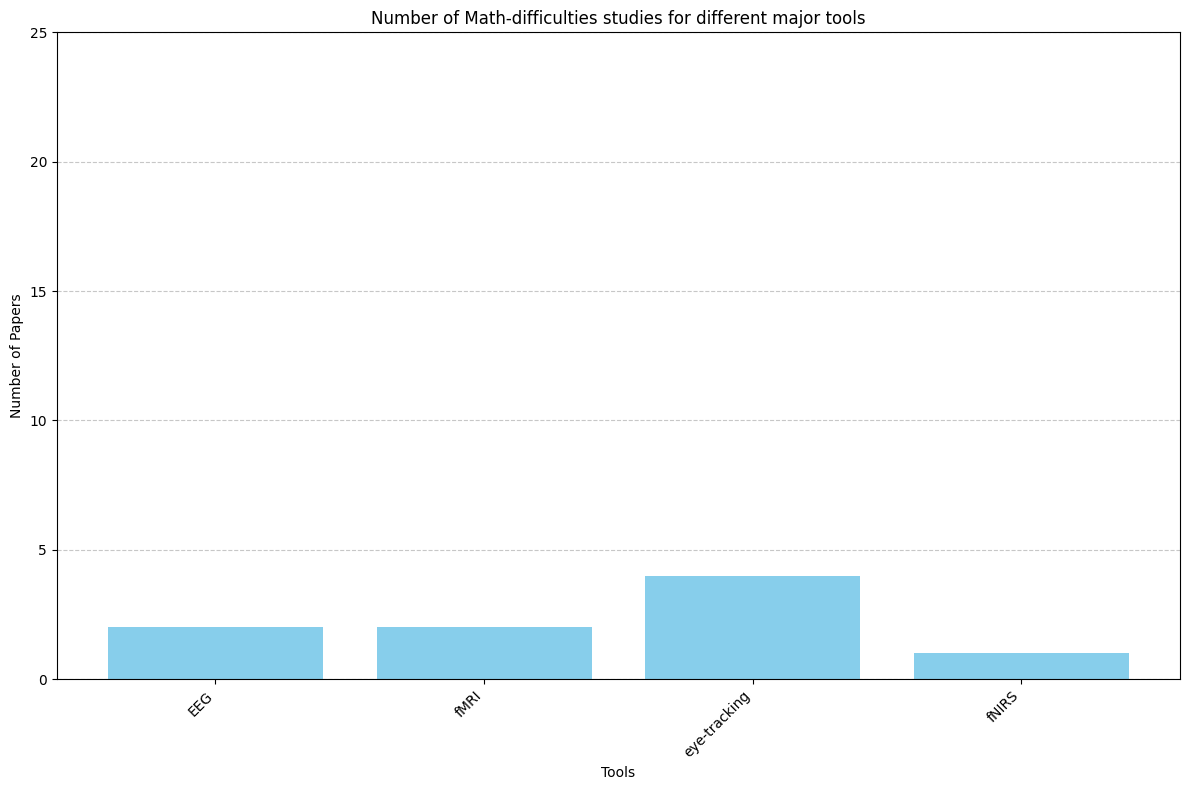

In [77]:
for psycho_term in psycho_terms:
    relevant_rows = covidence[covidence['Author Keywords'].str.lower().str.contains(psycho_term.lower())]
        
    search_terms_counts = {}
    for search_term, forms in search_terms.items():
        lower_keywords = relevant_rows['Author Keywords'].str.lower()
        contains_column = lower_keywords.str.contains(forms)  # column: True, True, False, False ...
        count_of_search_term = contains_column.sum()
        search_terms_counts[search_term] = count_of_search_term
    
    print(psycho_term, search_terms_counts)

    plt.figure(figsize=(12, 8))
    plt.bar(search_terms_counts.keys(), search_terms_counts.values(), color='skyblue')
    plt.title(f'Number of {psycho_term} studies for different major tools')
    plt.xlabel('Tools')
    plt.ylabel('Number of Papers')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(np.arange(0, 30, 5))
    plt.tight_layout()
    plt.show()

# 10. Authors with more than 5 Papers

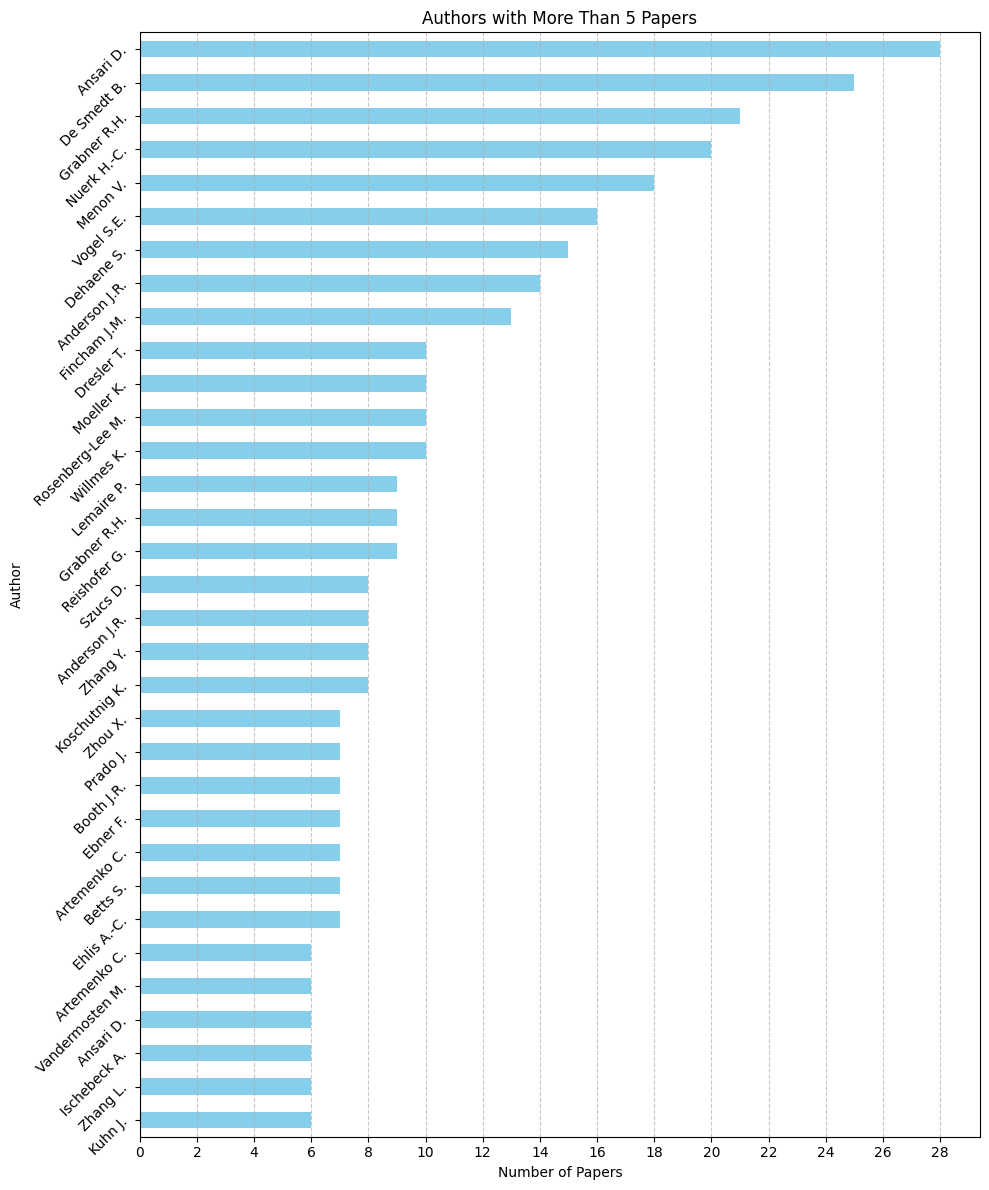

In [78]:
# Ensure the 'Authors' column is converted to strings
covidence['Authors'] = covidence['Authors'].astype(str).str.split(';')

# Count the occurrences of each author
author_counts = covidence['Authors'].explode().value_counts().sort_values(ascending=True)

# Filter authors with more than 5 articles
authors_more_than_5 = author_counts[author_counts > 5]

# Plot the data as a horizontal bar plot
authors_more_than_5.plot(kind='barh', color='skyblue', figsize=(10, 12))
plt.title('Authors with More Than 5 Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Author')
plt.xticks(np.arange(0, max(author_counts)+1, 2))
plt.yticks(rotation=45, ha='right')  # Rotate author names by 45 degrees for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 11. Journals with more than 3 Papers

Source title
neuroimage                           43
neuropsychologia                     35
journal of cognitive neuroscience    25
frontiers in human neuroscience      20
frontiers in psychology              15
human brain mapping                  14
developmental science                12
cerebral cortex                      12
plos one                             11
neuroreport                          10
Name: count, dtype: int64


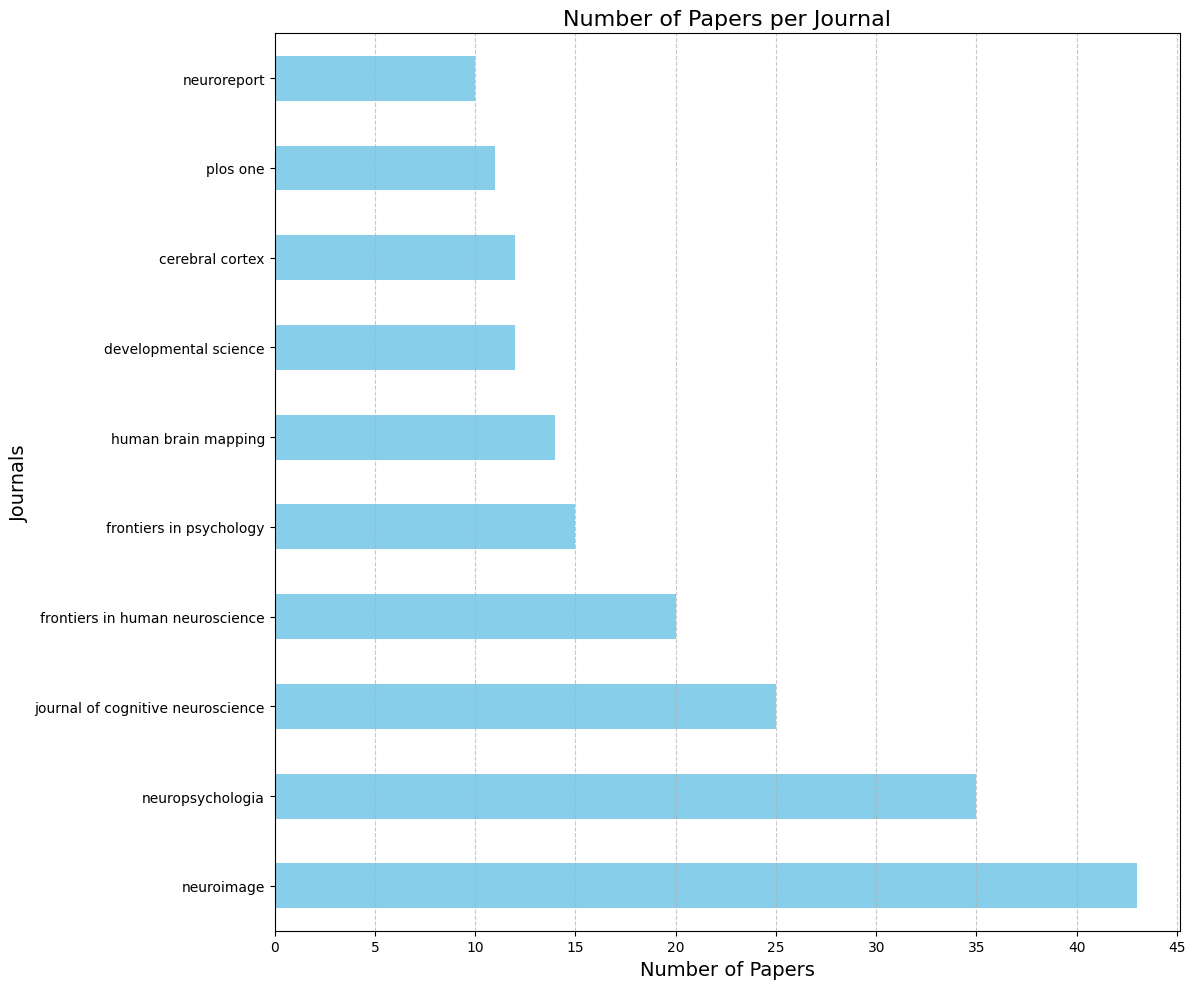

In [79]:
import matplotlib.pyplot as plt

# Count the number of articles published in each journal
articles_per_journal = covidence['Source title'].str.lower().value_counts()

# Filter out journals with more than 3 articles
filtered_articles_per_journal = articles_per_journal[articles_per_journal > 3]

# Select the top 10 journals
top_10_journals = filtered_articles_per_journal.head(10)

# Print the filtered counts for each journal
print(top_10_journals)

# Plot the data as a horizontal bar plot
plt.figure(figsize=(12, 10))  # Adjust the figure size
ax = top_10_journals.plot(kind='barh', color='skyblue')
plt.title('Number of Papers per Journal', fontsize=16)
plt.xlabel('Number of Papers', fontsize=14)
plt.ylabel('Journals', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Set x-axis to jump in increments of 1
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

plt.show()
